# Part I - PISA 2012 Exploratory data analysis
## by (Anas Azzioui)

## Introduction
PISA is a Program for International Student Assessment that assesses 15 years old students' competencies in 3 main subjects: mathematics, science and reading. It is conducted every 3 years, and each time the focus is on one of the subjects. In 2012, it was on mathematics. 

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [12]:
# Upload the whole file:

pisa_df = pd.read_csv('../pisa2012.csv', encoding="cp1252", sep=',', index_col=0);

/home/aazzioui/anaconda3/envs/data_analysis_process_env3-6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
pisa_df.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,8,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,10,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [14]:
pisa_df.shape

(485490, 635)

The file is "very big", it contains 485490 row and 635 columns including many that we believe we won't need in our analysis.

#### ***What columns to keep?***

In order to make the decision on the columns to keep for this study, I downloaded the student's questionnaire data file codebook https://www.oecd.org/pisa/pisaproducts/PISA12_stu_codebook.pdf , then I tried to understand what pieces of inormation we can get from each column and kept only what I believe might help us conduct this study.

In [15]:
pisa_df_reduced=pisa_df[['CNT','OECD','NC','ST01Q01','ST03Q01','ST03Q02','ST04Q01','ST08Q01','ST09Q01','ST115Q01','ST11Q01',
'ST11Q02','ST11Q03','ST11Q04','ST11Q05','ST19Q01','ST25Q01','ST26Q02','ST26Q04','ST26Q06','ST26Q09','ST27Q01','ST27Q02','ST27Q04',
'ST28Q01','ST29Q01','ST29Q03','ST29Q04','ST29Q06','ST35Q04','ST35Q05','ST35Q06','ST42Q01','ST42Q02','ST42Q06','ST42Q08','ST43Q01',
'ST43Q02','ST44Q03','ST44Q04','ST44Q05','ST44Q07','ST44Q08','ST46Q01','ST46Q02','ST46Q04','ST46Q05',
'ST46Q06','ST46Q09','ST49Q01','ST49Q02','ST49Q03','ST49Q05','ST49Q06','ST53Q01','ST53Q02','ST53Q03','ST53Q04','ST55Q02',
'ST77Q01','ST77Q02','ST79Q01','ST79Q02','ST79Q05','ST79Q06','ST79Q07','ST79Q08','ST85Q02','ST85Q03',
'ST86Q01','ST86Q05','ST87Q04','ST87Q05','ST87Q07','ST88Q02','ST88Q03','IC03Q01',
'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 
'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'W_FSTUWT']]

In [16]:
# In order to consume less RAM, I downloaded, as csv, a reduced version of the file 
# containing only relevant columns: 
pisa_df_reduced.to_csv('../pisa2012_short-listed.csv', sep=',')

For future use, we can directly read the reduced file version of the pisa 2012 data as follows:

In [2]:

pisa_df_reduced = pd.read_csv('../pisa2012_short-listed.csv', encoding="cp1252", sep=',', index_col=0);

/home/aazzioui/anaconda3/envs/data_analysis_process_env3-6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (77) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pisa_df_reduced.head()

,CNT,OECD,NC,ST01Q01,ST03Q01,ST03Q02,ST04Q01,ST08Q01,ST09Q01,ST115Q01,...,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,W_FSTUWT
1,Albania,Non-OECD,Albania,10,2,1996,Female,None,None,1.0,...,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,8.9096
2,Albania,Non-OECD,Albania,10,2,1996,Female,One or two times,None,1.0,...,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,8.9096
3,Albania,Non-OECD,Albania,9,9,1996,Female,None,None,1.0,...,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,8.4871
4,Albania,Non-OECD,Albania,9,8,1996,Female,None,None,1.0,...,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,8.4871
5,Albania,Non-OECD,Albania,9,10,1996,Female,One or two times,None,2.0,...,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,8.4871


Based on the pdf previously mentioned (file codebook https://www.oecd.org/pisa/pisaproducts/PISA12_stu_codebook.pdf), I gave more meaningful labels to the columns in order to be easily able to manipulate the data. 

In [4]:
# Rename columns:
columns_old_names=['CNT','OECD','NC','ST01Q01','ST03Q01','ST03Q02','ST04Q01','ST08Q01','ST09Q01','ST115Q01','ST11Q01',
'ST11Q02','ST11Q03','ST11Q04','ST11Q05','ST19Q01','ST25Q01','ST26Q02','ST26Q04','ST26Q06','ST26Q09','ST27Q01','ST27Q02','ST27Q04',
'ST28Q01','ST29Q01','ST29Q03','ST29Q04','ST29Q06','ST35Q04','ST35Q05','ST35Q06','ST42Q01','ST42Q02','ST42Q06','ST42Q08','ST43Q01',
'ST43Q02','ST44Q03','ST44Q04','ST44Q05','ST44Q07','ST44Q08','ST46Q01','ST46Q02','ST46Q04','ST46Q05',
'ST46Q06','ST46Q09','ST49Q01','ST49Q02','ST49Q03','ST49Q05','ST49Q06','ST53Q01','ST53Q02','ST53Q03','ST53Q04','ST55Q02',
'ST77Q01','ST77Q02','ST79Q01','ST79Q02','ST79Q05','ST79Q06','ST79Q07','ST79Q08','ST85Q02','ST85Q03',
'ST86Q01','ST86Q05','ST87Q04','ST87Q05','ST87Q07','ST88Q02','ST88Q03','IC03Q01',
'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 
'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'W_FSTUWT']

columns_new_names= ['Country_code','OECD_1_0','NC','International_grade','Birth_Month','Birth_Year','Gender','Late_for_school','Skip_whole_school_day','Skip_classes_within_school_day','At_home_mother',
'At_home_father','At_home_brothers','At_home_sisters','At_home_grand_parents','Father_current_job_status','lang_at_home','has_own_room','has_computer','has_internet','has_art','cellulars_at_home','televisions_at_home','cars_at_home',
'books_at_home','Enjoy_Reading','Look_Forward_to_Lessons','Enjoy_Maths','Interested_in_math','Parents_believe_math_important','Parents_believe_math_important_for_career','Parents_like_math','Worry_that_math_isDifficult','I_am_not_good_at_math','ILearning_strategies_learn_math_quickly','I_feel_helpless','I_can_succeed_with_enough_effort',
'Doing_well_is_up_to_me','Teacher_didnt_explain_well','Failure_cause_bad_guesses','Failure_cause_material_too_hard','Failure_cause_teacher_didnt_get_student_interested','Failure_cause_unlucky','Homework_completed_in_time','Work_hard_on_homework','Study_hard_for_quizzes','Study_until_understand_everything',
'Pay_attention_in_classes','Keep_work_organized','Talk_about_maths_with_friends','Help_friends_with_math','Math_extracurrucula_activity','Study_more_than_extra_2h_aDay','Play_chess','Q01_Learning_strategies','Q02_Learning_strategies','Q03_Learning_strategies','Q04_Learning_strategies','Math_out_of_school_lessons',
'Teacher_shows_interest','Teacher_gives_extra_help','Teacher_sets_clear_goals','Teacher_encourages_thinking_and_reasoning','Teacher_gives_formative_assessments_feedback','Teacher_checks_understanding','Work_in_small_groups','Teacher_summarizes_prev_lessons','teacher_keeps_class_orderly','Teacher_starts_on_time',
'Get_along_with_teachers','Teachers_treat_students_fair','Feel_awkward_at_school','Liked_by_other_students','Feel_happy_at_school','School_is_waste_of_time','School_gave_me_confidence','First_use_of_computers',
'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 
'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE','Final_student_weight']

# Convert the 2 above lists into a dictionary:
column_names= dict(zip(columns_old_names, columns_new_names))
#print("Resultant dictionary is : " + str(column_names))

# rename in the dataframe and the file:
pisa_df_reduced.rename(columns=column_names, inplace=True)


In [5]:
pisa_df_reduced.head()

,Country_code,OECD_1_0,NC,International_grade,Birth_Month,Birth_Year,Gender,Late_for_school,Skip_whole_school_day,Skip_classes_within_school_day,...,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Final_student_weight
1,Albania,Non-OECD,Albania,10,2,1996,Female,None,None,1.0,...,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,8.9096
2,Albania,Non-OECD,Albania,10,2,1996,Female,One or two times,None,1.0,...,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,8.9096
3,Albania,Non-OECD,Albania,9,9,1996,Female,None,None,1.0,...,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,8.4871
4,Albania,Non-OECD,Albania,9,8,1996,Female,None,None,1.0,...,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,8.4871
5,Albania,Non-OECD,Albania,9,10,1996,Female,One or two times,None,2.0,...,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,8.4871


In [7]:
pisa_df_reduced.shape

(485490, 93)

There are many labels that are related to each other and could help understand many caracteristics of the data such as:

#### Student's general information:
- 'Country_code',
- 'OECD_1_0',
- 'NC',
- 'International_grade',
- 'Birth_Month',
- 'Birth_Year',
- 'Gender'

#### Student's Truancy (absenteeism):
- 'Late_for_school',
- 'Skip_whole_school_day',
- 'Skip_classes_within_school_day'

#### Student's home situation and possessions:
- 'At_home_mother',
- 'At_home_father',
- 'At_home_brothers',
- 'At_home_sisters',
- 'At_home_grand_parents',
- 'Father_current_job_status',
- 'lang_at_home',
- 'has_own_room',
- 'has_computer',
- 'has_internet',
- 'has_art',
- 'cellulars_at_home',
- 'televisions_at_home',
- 'cars_at_home',
- 'books_at_home',
- 'First_use_of_computers'

#### Student's math interest:
- 'Enjoy_Reading',
- 'Look_Forward_to_Lessons',
- 'Enjoy_Maths',
- 'Interested_in_math'

#### Parent's math interest from children's opinion:
- 'Parents_believe_math_important',
- 'Parents_believe_math_important_for_career',
- 'Parents_like_math'

#### Student's perceived control:
- 'Worry_that_math_isDifficult',
- 'I_am_not_good_at_math',
- 'ILearning_strategies_learn_math_quickly',
- 'I_feel_helpless',
- 'I_can_succeed_with_enough_effort',
- 'Doing_well_is_up_to_me'

#### Student's attributions to failure:
- 'Teacher_didnt_explain_well',
- 'Failure_cause_bad_guesses',
- 'Failure_cause_material_too_hard',
- 'Failure_cause_teacher_didnt_get_student_interested',
- 'Failure_cause_unlucky'

#### Student's work ethics and behaviour:
- 'Homework_completed_in_time',
- 'Work_hard_on_homework',
- 'Study_hard_for_quizzes',
- 'Study_until_understand_everything',
- 'Pay_attention_in_classes',
- 'Keep_work_organized',
- 'Talk_about_maths_with_friends',
- 'Help_friends_with_math',
- 'Math_extracurrucula_activity',
- 'Study_more_than_extra_2h_aDay',
- 'Math_out_of_school_lessons',
- 'Play_chess'

#### Student's learning startegies:
- 'Q01_Learning_strategies',
- 'Q02_Learning_strategies',
- 'Q03_Learning_strategies',
- 'Q04_Learning_strategies'

#### Student's perception on teaching :
- 'Teacher_shows_interest',
- 'Teacher_gives_extra_help',
- 'Teacher_sets_clear_goals',
- 'Teacher_encourages_thinking_and_reasoning',
- 'Teacher_gives_formative_assessments_feedback',
- 'Teacher_checks_understanding',
- 'Work_in_small_groups',
- 'Teacher_summarizes_prev_lessons',
- 'teacher_keeps_class_orderly',
- 'Teacher_starts_on_time',
- 'Get_along_with_teachers',
- 'Teachers_treat_students_fair'

#### Student's perception on school :
- 'Feel_awkward_at_school',
- 'Liked_by_other_students',
- 'Feel_happy_at_school',
- 'School_is_waste_of_time',
- 'School_gave_me_confidence'

#### Student's scores :
- 'PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH',
- 'PV1READ','PV2READ','PV3READ','PV4READ', 'PV5READ',
- 'PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE',
- 'Final_student_weight'



The above segmentation of data will help us understand better some of many aspects that influences the student's math scores in different countries. We will try to focus on features related to the country with the best average math score.

Let's see what countries we have in this data:

In [21]:
pisa_df_reduced['Country_code'].value_counts()

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
                            ...  
Florida (USA)                1896
Perm(Russian Federation)     1761
Massachusetts (USA)          1723
Connecticut (USA)            1697
Liechtenstein                 293
Name: Country_code, Length: 68, dtype: int64

Notice: There are some states that are not countries like  Massachusetts (USA), Florida (USA) and Connecticut (USA).

In [6]:
pisa_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 93 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Country_code                                        485490 non-null  object 
 1   OECD_1_0                                            485490 non-null  object 
 2   NC                                                  485490 non-null  object 
 3   International_grade                                 485490 non-null  int64  
 4   Birth_Month                                         485490 non-null  int64  
 5   Birth_Year                                          485490 non-null  int64  
 6   Gender                                              485490 non-null  object 
 7   Late_for_school                                     479143 non-null  object 
 8   Skip_whole_school_day                               479131 non-n

***Conclusions from first exploration of data:***
* __Define__:
    - Apart from the columns with students' personal information and those containing the disciplines scores, all other columns have missing values.
    - There are 93 columns, but we need to add 3 columns related to the average score of each discipline (Math,Reading,Sciences), then drop the columns with the splitted scores.
    - Some data about countries has to be corrected. States are to be replaced by there respective country "United States of America (USA)".
    - Some columns' types should be converted to more appropriate ones (we might not need this because we won't use all columns in our analysis)
    

* __Define 1:__ Complete missing values

* __Code 1:__ Complete missing values

We do have a lot of columns with missing data. In order to make our analysis, we will try to randomly complete data with existing values in each column. However, we will take into consideration the weight of each variable. For example:

Let's suppose we have a column scores with 15 values including four 'no', six 'yes' and 5 Null : [no,no,NULL,no,no,NULL,NULL,yes,NULL,yes,yes,yes,yes,yes,NULL]

Then, for non NULL values, we have 40% of 'no' and 60% of 'yes'. According to that, we will randomly fill 40% of NULL values with 'no' (which represents 2 out of the 5 NULL data) and 60% of the rest of NULL values with 'yes' (which represents 3 out of the 5 NULL data).

In [7]:
#Function to create Proportional Sampling Using Weighted Values
# https://blog.finxter.com/proportional-sampling-using-weighted-values/

from random import uniform
def proportional_sampling(list_values,list_weights):
    total_sum = sum(list_weights)
    normalized_weights = [weight/total_sum for weight in list_weights]
    cum_sum = [normalized_weights[0]] 
    r = uniform(0,1)
    
    for i in range(1, len(normalized_weights)):
        cum_sum.append(cum_sum[i-1] + normalized_weights[i])
    for index, value in enumerate(cum_sum):
        if r <=  value:
            return list_values[index]  


In [8]:
#Function to fill empty values proportionally and randomly with already existing values
# Source of inspiration: https://stackoverflow.com/questions/47497466/python-fill-na-in-pandas-column-with-random-elements-from-a-list

def fill_nan_proportionally(df,the_column):
    proportions= dict(df.value_counts(the_column))
    values_count=list(proportions.values())
    values_list=list(proportions.keys())
    total_null_values=df[the_column].isna().sum()
    new_elements_list=[]
    for i in range(0, total_null_values):
        element=proportional_sampling(values_list,values_count)
        new_elements_list.append(element)
    
    all_nans = df[the_column].isnull()

    df.loc[all_nans, the_column] = new_elements_list

In [9]:
# Fill all NULL values in all dataframe columns using fill_nan_proportionally function
column_headers = pisa_df_reduced.columns.values.tolist()
for the_column in column_headers:
    if pisa_df_reduced[the_column].isnull().values.any():
        fill_nan_proportionally(pisa_df_reduced,the_column)
    else:
        continue

* __Test 1:__ 

In [10]:
pisa_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 93 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Country_code                                        485490 non-null  object 
 1   OECD_1_0                                            485490 non-null  object 
 2   NC                                                  485490 non-null  object 
 3   International_grade                                 485490 non-null  int64  
 4   Birth_Month                                         485490 non-null  int64  
 5   Birth_Year                                          485490 non-null  int64  
 6   Gender                                              485490 non-null  object 
 7   Late_for_school                                     485490 non-null  object 
 8   Skip_whole_school_day                               485490 non-n

Now we have filled the missing values randomly with other existing answers for respectively in each column, taking into consideration their weight in the whole data. 

* __Define 2:__ Create an average score for each discipline

* __Code 2:__ 


Let's calculate the average of each discipline for each student:

In [11]:
# MATH Average results:
pisa_df_reduced['Avg_math_results']=pisa_df_reduced[['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH']].mean(axis=1)
# Reading Average results:
pisa_df_reduced['Avg_read_results']=pisa_df_reduced[['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ']].mean(axis=1)
# Science Average results:
pisa_df_reduced['Avg_science_results']=pisa_df_reduced[['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']].mean(axis=1)

* __Test 2:__ 


In [12]:
pisa_df_reduced[['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH','Avg_math_results']]

,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,Avg_math_results
1,406.8469,376.4683,344.5319,321.1637,381.9209,366.18634
2,486.1427,464.3325,453.4273,472.9008,476.0165,470.56396
3,533.2684,481.0796,489.6479,490.4269,533.2684,505.53824
4,412.2215,498.6836,415.3373,466.7472,454.2842,449.45476
5,381.9209,328.1742,403.7311,418.5309,395.1628,385.50398
...,...,...,...,...,...,...
485486,477.1849,493.5426,479.5217,486.5322,494.3215,486.22058
485487,518.9360,515.8202,505.6940,596.8297,508.8098,529.21794
485488,475.2376,482.2480,507.9530,457.3220,508.7319,486.29850
485489,550.9503,517.4560,529.1401,515.8981,501.0983,522.90856


Now we have 3 columns that represents the average score of each discipline for each student.

* __Define 3:__ Replace states in 'country_code' with the respective country

* __Code 3:__ 

In [13]:
pisa_df_reduced['Country_code'].value_counts()[['United States of America']].sum()

4978

In [15]:
pisa_df_reduced['Country_code'].value_counts()[['United States of America','Florida (USA)','Massachusetts (USA)','Connecticut (USA)']].sum()

10294

We do have in total 10294 students from the 'United States of America'

In [14]:
states=['Florida (USA)','Massachusetts (USA)','Connecticut (USA)']

pisa_df_reduced['Country_code'].replace(states, 'United States of America', inplace=True)

* __Test 3:__ 

In [15]:
pisa_df_reduced['Country_code'].value_counts()[['United States of America']]

United States of America    10294
Name: Country_code, dtype: int64

Now we have only countries in the 'Country_code' column.


### The main feature(s) of interest in the dataset that will help support the investigation:

As previously stated, we have extracted a lot of data grouped into many features. We are mainly interested in understanding the impact of the following features on the students' math scores:

##### Student general information:
    - Country_code
    - International_grade
    - Gender

##### Student Truancy (absenteeism):
    - Late_for_school
    - Skip_whole_school_day
    - Skip_classes_within_school_day

#### Student's math interest:
    - Enjoy_Reading
    - Look_Forward_to_Lessons
    - Enjoy_Maths
    - Interested_in_math

#### Parent's math interest from children view:
    - Parents_believe_math_important
    - Parents_believe_math_important_for_career
    - Parents_like_math

#### Student's attributions to failure:
    - Teacher_didnt_explain_well
    - Failure_cause_bad_guesses
    - Failure_cause_material_too_hard
    - Failure_cause_teacher_didnt_get_student_interested
    - Failure_cause_unlucky

#### Student's work ethics and behaviour:
    - Homework_completed_in_time
    - Work_hard_on_homework
    - Study_hard_for_quizzes
    - Study_until_understand_everything
    - Pay_attention_in_classes
    - Keep_work_organized
    - Talk_about_maths_with_friends
    - Help_friends_with_math
    - Math_extracurrucula_activity
    - Study_more_than_extra_2h_aDay
    - Math_out_of_school_lessons
    - Play_chess

#### Student's learning startegies:
    - Q01_Learning_strategies
    - Q02_Learning_strategies
    - Q03_Learning_strategies
    - Q04_Learning_strategies

#### Student's scores :
    - Avg_math_results


## Univariate Exploration

**Scores**

Since we want to study the impact of different variables on the scores, let's explore the math scores distributions first. This is a quantitative data, so we will use a histogram with a range of values:

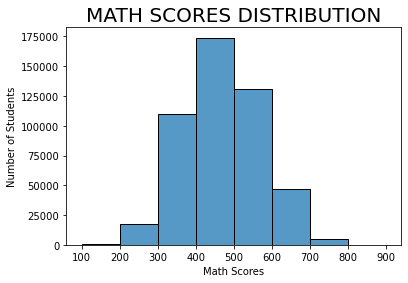

In [16]:
bins= np.arange(100, pisa_df_reduced.Avg_math_results.max()+1,100 )
sb.histplot(pisa_df_reduced['Avg_math_results'], bins=bins);
plt.title('MATH SCORES DISTRIBUTION', size=20)
plt.xlabel('Math Scores')
plt.ylabel('Number of Students');

This seems like a normal distribution of the scores with the highest number of students having a score between 400 and 500.

**Gender**

How males and females participated in the study?

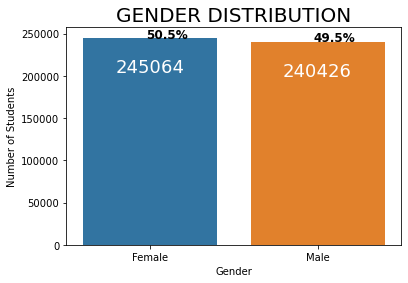

In [269]:
ax=sb.countplot(data=pisa_df_reduced, x='Gender');
total = pisa_df_reduced['Gender'].value_counts().sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()-0.3
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', fontsize=12, weight='bold')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)

#plt.xlabel('Math Scores')
#plt.ylabel('Number of Students');
plt.title('GENDER DISTRIBUTION', size=20)
plt.ylabel('Number of Students');

It seems like the gender is almost equally distributed

**Grades**

We know that the pisa test is done by students of 15 years old. So what is the distribution of their grades?

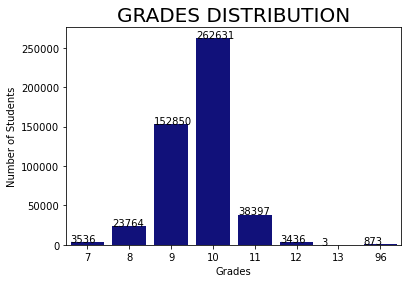

In [192]:
# Valid python colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
ax=sb.countplot(data=pisa_df_reduced, x='International_grade', color='darkblue');
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.title('GRADES DISTRIBUTION', size=20)
plt.xlabel('Grades')
plt.ylabel('Number of Students');

It seems like most of the students are in grades 9 or 10.

**Let's create a dataframe for students who scored 600 or above**

This will help understand if there are any common caracteristics among them.

In [ ]:
pisa_df_600=pisa_df_reduced.query('Avg_math_results>=600')

**Have TOP STUDENTS their own room?**

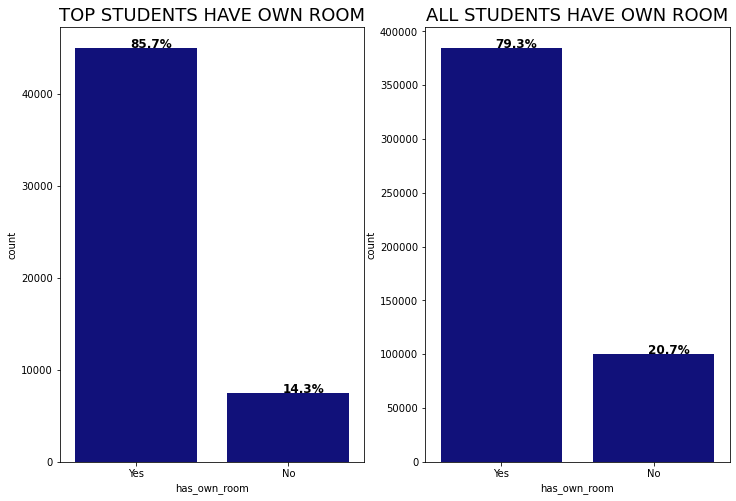

In [282]:
fig, ax = plt.subplots(ncols=2, figsize = [12,8])
order=['Yes','No']
sb.countplot(data=pisa_df_600, x='has_own_room', color='darkblue', order=order, ax = ax[0]).axes.set_title("TOP STUDENTS HAVE OWN ROOM",fontsize=18);
sb.countplot(data=pisa_df_reduced, x='has_own_room', color='darkblue', order=order, ax = ax[1]).axes.set_title("ALL STUDENTS HAVE OWN ROOM",fontsize=18);
total_600 = pisa_df_600['has_own_room'].value_counts().sum()
total = pisa_df_reduced['has_own_room'].value_counts().sum()
for p in ax[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_600)
    x = p.get_x() + p.get_width()-0.3
    y = p.get_height()
    ax[0].annotate(percentage, (x, y),ha='center', fontsize=12, weight='bold')
for p in ax[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()-0.3
    y = p.get_height()
    ax[1].annotate(percentage, (x, y),ha='center', fontsize=12, weight='bold')

Most of the students have their own room.

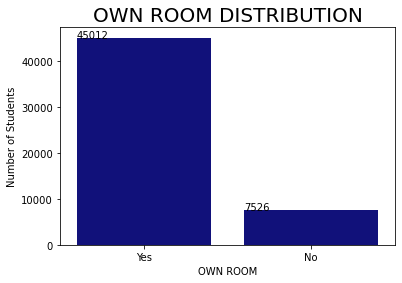

In [239]:
ax=sb.countplot(data=pisa_df_600, x='has_own_room', color='darkblue');
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.title('OWN ROOM DISTRIBUTION', size=20)
plt.xlabel('OWN ROOM')
plt.ylabel('Number of Students');



**Truancy (Absenteeism)**

Let's find out how many students go late to the school, skip classes within school day or skip the whole school day:

Let's Check the values in the columns related to truancy:

In [49]:
pisa_df_reduced.Late_for_school.value_counts()

None                     310088
One or two times         126085
Three or four times       30197
Five or more times        19120
Name: Late_for_school, dtype: int64

In [238]:
pisa_df_600.Late_for_school.value_counts()

None                     40379
One or two times          9545
Three or four times       1719
Five or more times         895
Name: Late_for_school, dtype: int64

In [74]:
pisa_df_reduced.Skip_whole_school_day.value_counts()

None                     391100
One or two times          77000
Three or four times       11029
Five or more times         6361
Name: Skip_whole_school_day, dtype: int64

In [73]:
pisa_df_reduced.Skip_classes_within_school_day.value_counts()

1.0    383485
2.0     82406
3.0     12370
4.0      7229
Name: Skip_classes_within_school_day, dtype: int64

After checking the official pisa documentation, we found out that in "Skip_classes_within_school_day":

    - 1.0 = "None"
    - 2.0 = "One or two times"
    - 3.0 = "Three or four times"
    - 4.0 = "Five or more times"

So, let's replace those values and make the data type correct before ploting:

In [20]:
# convert the data type to categorical:

pisa_df_reduced['Skip_classes_within_school_day'].astype('category')

1         1.0
2         1.0
3         1.0
4         1.0
5         2.0
         ... 
485486    1.0
485487    1.0
485488    1.0
485489    1.0
485490    1.0
Name: Skip_classes_within_school_day, Length: 485490, dtype: category
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

In [21]:
# replace values with new one:
pisa_df_reduced['Skip_classes_within_school_day'] = pisa_df_reduced['Skip_classes_within_school_day'].replace([1.0, 2.0, 3.0,4.0], ['None', 'One or two times', 'Three or four times', 'Five or more times'])

In [22]:
# test the values
pisa_df_reduced.Skip_classes_within_school_day.value_counts()

None                   383531
One or two times        82349
Three or four times     12378
Five or more times       7232
Name: Skip_classes_within_school_day, dtype: int64

Now that we have understandable values, we can plot all 3 absenteeism variables together:

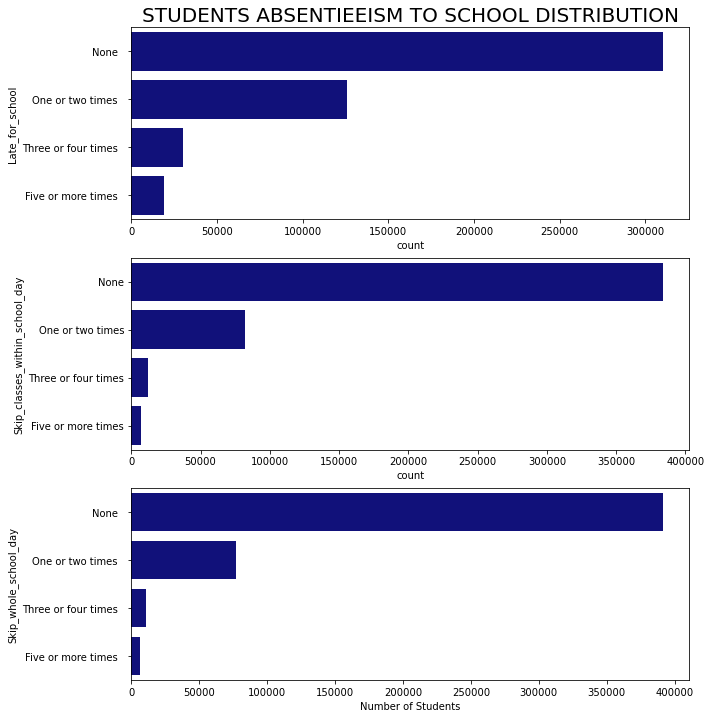

In [206]:
# Let's plot all three together
fig, ax = plt.subplots(nrows=3, figsize = [10,12])

order_late= pisa_df_reduced['Late_for_school'].value_counts().index
order_skip_class= pisa_df_reduced['Skip_classes_within_school_day'].value_counts().index
order_skip_day= pisa_df_reduced['Skip_whole_school_day'].value_counts().index

sb.countplot(data=pisa_df_reduced, y='Late_for_school', color='darkblue', order=order_late, ax = ax[0]).axes.set_title("STUDENTS ABSENTIEEISM TO SCHOOL DISTRIBUTION",fontsize=20)
sb.countplot(data=pisa_df_reduced, y='Skip_classes_within_school_day', color='darkblue', order=order_skip_class, ax = ax[1]);
sb.countplot(data=pisa_df_reduced, y='Skip_whole_school_day', color='darkblue', order=order_skip_day, ax = ax[2]);
plt.xlabel('Number of Students')
plt.show()

Most students don't skip classes or school, but the number of students doing it or being late at least one time is by no means insignificant and deserves to be pointed out.

**Students' interest in math**

Let's find out how interested students are towards mathematics:

In [96]:
print(pisa_df_reduced.Enjoy_Reading.value_counts())
print(pisa_df_reduced.Look_Forward_to_Lessons.value_counts())
print(pisa_df_reduced.Enjoy_Maths.value_counts())
print(pisa_df_reduced.Interested_in_math.value_counts())

Disagree             188640
Agree                154842
Strongly disagree     97653
Strongly agree        44355
Name: Enjoy_Reading, dtype: int64
Disagree             182812
Agree                162178
Strongly disagree     86448
Strongly agree        54052
Name: Look_Forward_to_Lessons, dtype: int64
Disagree             180240
Agree                156398
Strongly disagree     83997
Strongly agree        64855
Name: Enjoy_Maths, dtype: int64
Agree                211872
Disagree             137453
Strongly agree        86541
Strongly disagree     49624
Name: Interested_in_math, dtype: int64


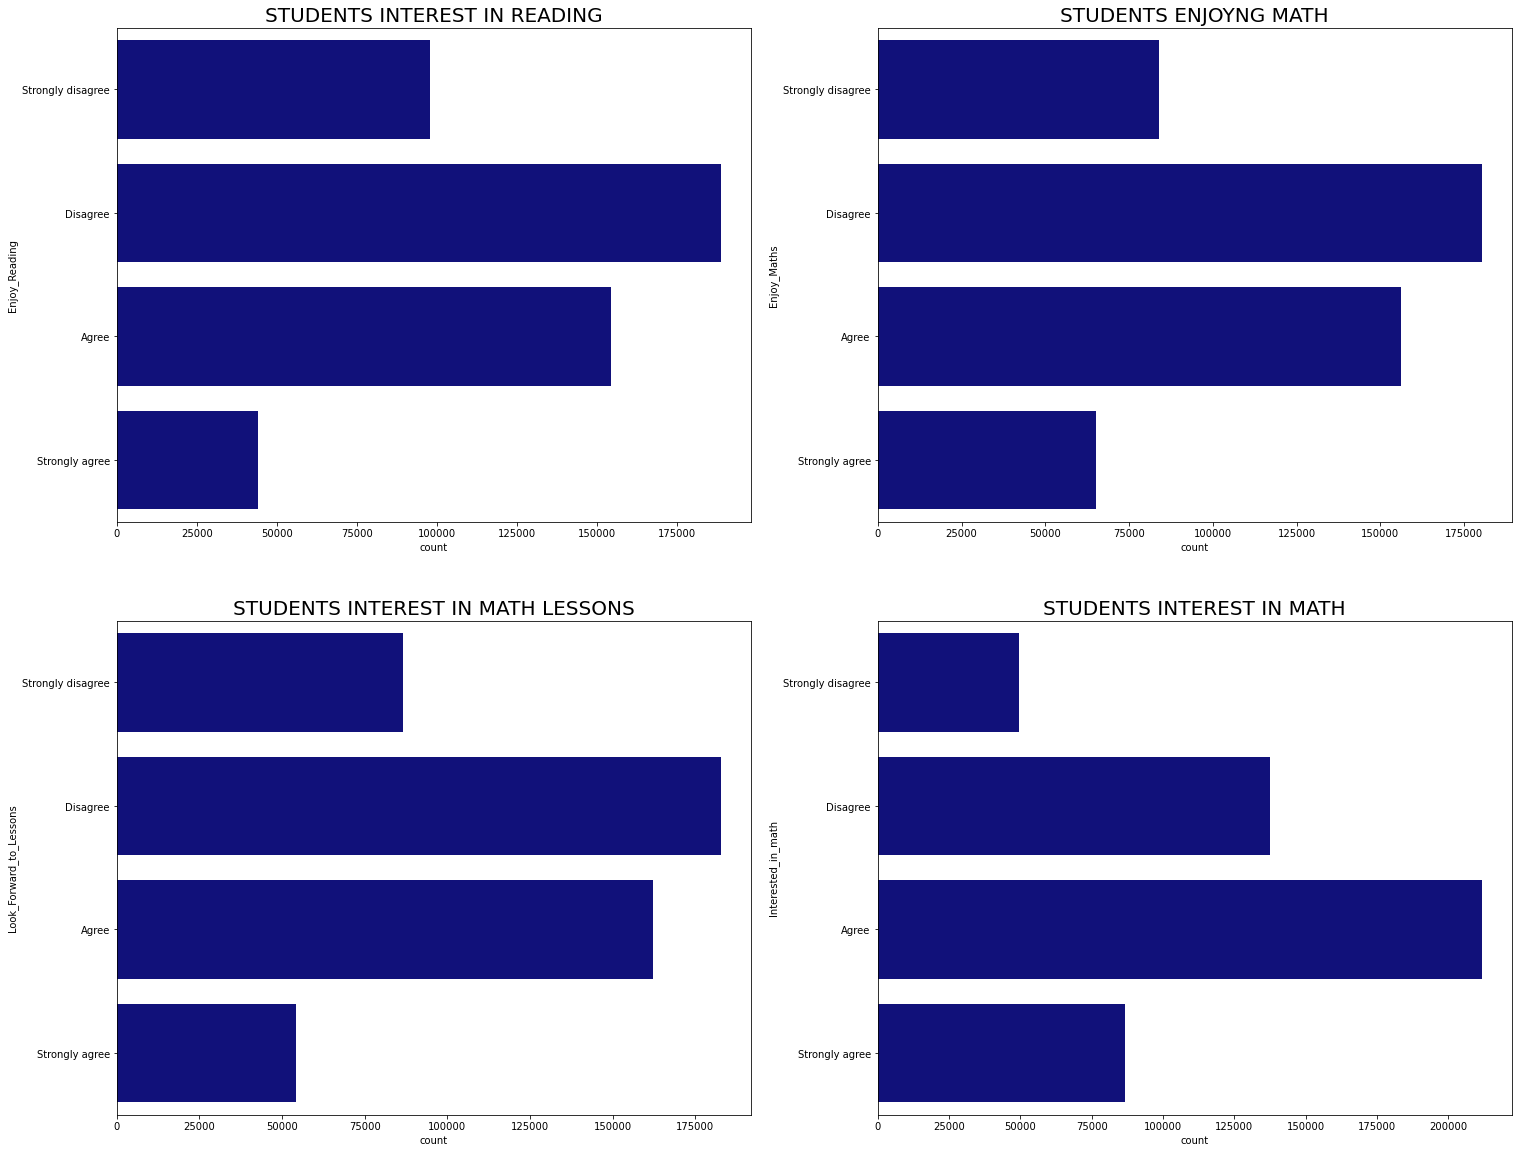

In [214]:
# Let's plot all four together
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = [25,20])

order=['Strongly disagree','Disagree','Agree','Strongly agree']

sb.countplot(data=pisa_df_reduced, y='Enjoy_Reading', color='darkblue', order=order, ax = ax[0,0]).axes.set_title("STUDENTS INTEREST IN READING",fontsize=20)
sb.countplot(data=pisa_df_reduced, y='Look_Forward_to_Lessons', color='darkblue', order=order, ax = ax[1,0]).axes.set_title("STUDENTS INTEREST IN MATH LESSONS",fontsize=20);
sb.countplot(data=pisa_df_reduced, y='Enjoy_Maths', color='darkblue', order=order, ax = ax[0,1]).axes.set_title("STUDENTS ENJOYNG MATH",fontsize=20);
sb.countplot(data=pisa_df_reduced, y='Interested_in_math', color='darkblue', order=order, ax = ax[1,1]).axes.set_title("STUDENTS INTEREST IN MATH",fontsize=20);

plt.show()

**Parents' interest in math**

Let's find out how interested parents are towards mathematics from their children's perspective:

In [118]:
print(pisa_df_reduced.Parents_like_math.value_counts())
print(pisa_df_reduced.Parents_believe_math_important.value_counts())
print(pisa_df_reduced.Parents_believe_math_important_for_career.value_counts())

Agree                230690
Disagree             145637
Strongly agree        76623
Strongly disagree     32540
Name: Parents_like_math, dtype: int64
Agree                236531
Strongly agree       203997
Disagree              36023
Strongly disagree      8939
Name: Parents_believe_math_important, dtype: int64
Agree                223557
Strongly agree       177438
Disagree              71310
Strongly disagree     13185
Name: Parents_believe_math_important_for_career, dtype: int64


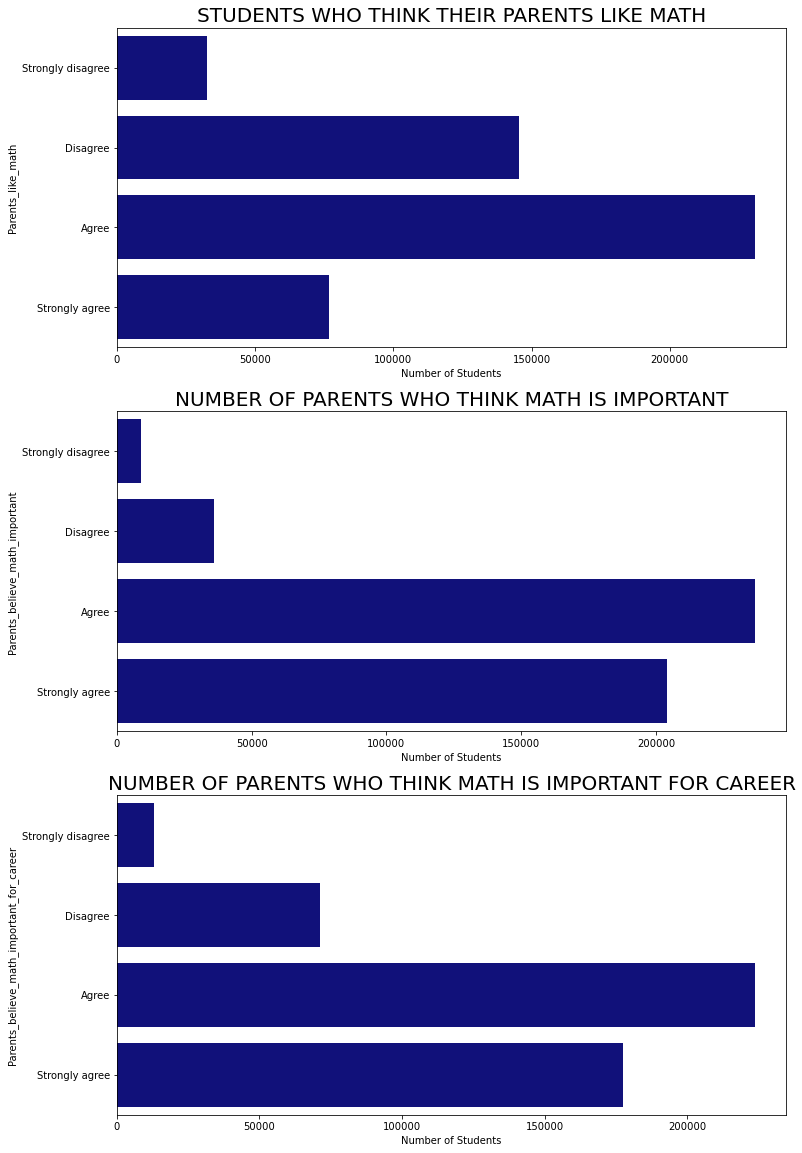

In [152]:
# Let's plot all 3 together
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize = [12,20])

order=['Strongly disagree','Disagree','Agree','Strongly agree']

sb.countplot(data=pisa_df_reduced, y='Parents_like_math', color='darkblue', order=order, ax = ax1).axes.set_title("STUDENTS WHO THINK THEIR PARENTS LIKE MATH",fontsize=20)
sb.countplot(data=pisa_df_reduced, y='Parents_believe_math_important', color='darkblue', order=order, ax = ax2).axes.set_title("NUMBER OF PARENTS WHO THINK MATH IS IMPORTANT",fontsize=20);
sb.countplot(data=pisa_df_reduced, y='Parents_believe_math_important_for_career', color='darkblue', order=order, ax = ax3).axes.set_title("NUMBER OF PARENTS WHO THINK MATH IS IMPORTANT FOR CAREER",fontsize=20);

ax1.set(xlabel='Number of Students')
ax2.set(xlabel='Number of Students')
ax3.set(xlabel='Number of Students')

plt.show()

**Failure attributions**

Let's see to what students attribute their math failures:

In [125]:
print(pisa_df_reduced.Teacher_didnt_explain_well.value_counts())
print(pisa_df_reduced.Failure_cause_bad_guesses.value_counts())
print(pisa_df_reduced.Failure_cause_material_too_hard.value_counts())
print(pisa_df_reduced.Failure_cause_teacher_didnt_get_student_interested.value_counts())
print(pisa_df_reduced.Failure_cause_unlucky.value_counts())

Slightly likely      169663
Likely               162709
Not at all likely     92634
Very   Likely         60484
Name: Teacher_didnt_explain_well, dtype: int64
Likely               170685
Slightly likely      153083
Not at all likely    106291
Very   Likely         55431
Name: Failure_cause_bad_guesses, dtype: int64
Likely               216442
Very   Likely        125051
Slightly likely      105768
Not at all likely     38229
Name: Failure_cause_material_too_hard, dtype: int64
Likely               158094
Slightly likely      154629
Very   Likely         86752
Not at all likely     86015
Name: Failure_cause_teacher_didnt_get_student_interested, dtype: int64
Likely               153634
Slightly likely      142949
Not at all likely    111532
Very   Likely         77375
Name: Failure_cause_unlucky, dtype: int64


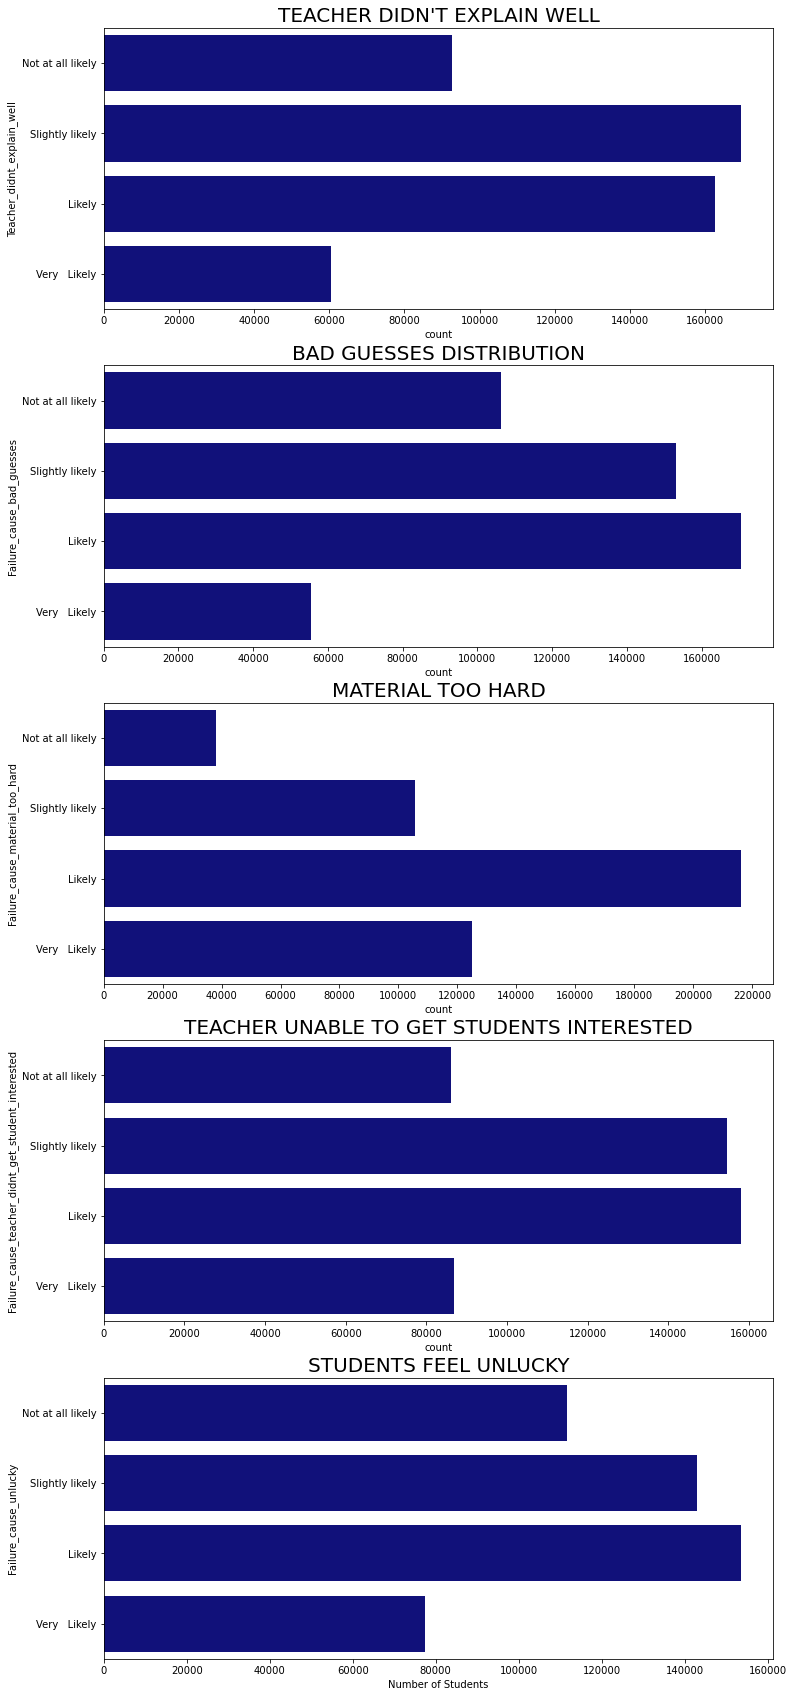

In [153]:
# Let's plot all 3 together
fig, ax = plt.subplots(nrows=5, figsize = [12,30])
order=['Not at all likely','Slightly likely','Likely','Very   Likely']
# we add xticks for countplot ax[2] related to "Material too hard" because 
# it is the only one that is represented by 50000 ticks and it gives slightly a wrong idea compared to other plots
ax[2].set(xticks=[0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000])

sb.countplot(data=pisa_df_reduced, y='Teacher_didnt_explain_well', color='darkblue', order=order, ax = ax[0]).axes.set_title("TEACHER DIDN'T EXPLAIN WELL",fontsize=20)
sb.countplot(data=pisa_df_reduced, y='Failure_cause_bad_guesses', color='darkblue', order=order, ax = ax[1]).axes.set_title("BAD GUESSES DISTRIBUTION",fontsize=20);
sb.countplot(data=pisa_df_reduced, y='Failure_cause_material_too_hard', color='darkblue', order=order, ax = ax[2]).axes.set_title("MATERIAL TOO HARD",fontsize=20)
sb.countplot(data=pisa_df_reduced, y='Failure_cause_teacher_didnt_get_student_interested', color='darkblue', order=order, ax = ax[3]).axes.set_title("TEACHER UNABLE TO GET STUDENTS INTERESTED",fontsize=20);
sb.countplot(data=pisa_df_reduced, y='Failure_cause_unlucky', color='darkblue', order=order, ax = ax[4]).axes.set_title("STUDENTS FEEL UNLUCKY",fontsize=20);

plt.xlabel('Number of Students')
plt.show()

Students tend to think more that math material is too hard as a couse of failure

**Students' work ethics and behaviour**

Let's find out the most common students work ethics in mathematics:

In [157]:
print(pisa_df_reduced.Homework_completed_in_time.value_counts())
print(pisa_df_reduced.Work_hard_on_homework.value_counts())
print(pisa_df_reduced.Study_hard_for_quizzes.value_counts())
print(pisa_df_reduced.Study_until_understand_everything.value_counts())
print(pisa_df_reduced.Pay_attention_in_classes.value_counts())
print(pisa_df_reduced.Keep_work_organized.value_counts())


Agree                229400
Strongly agree       118914
Disagree             108987
Strongly disagree     28189
Name: Homework_completed_in_time, dtype: int64
Agree                226185
Disagree             137621
Strongly agree        92575
Strongly disagree     29109
Name: Work_hard_on_homework, dtype: int64
Agree                200161
Disagree             168857
Strongly agree        82262
Strongly disagree     34210
Name: Study_hard_for_quizzes, dtype: int64
Agree                220057
Disagree             143060
Strongly agree        96028
Strongly disagree     26345
Name: Study_until_understand_everything, dtype: int64
Agree                266866
Strongly agree       128355
Disagree              74740
Strongly disagree     15529
Name: Pay_attention_in_classes, dtype: int64
Agree                221563
Disagree             136557
Strongly agree        98370
Strongly disagree     29000
Name: Keep_work_organized, dtype: int64


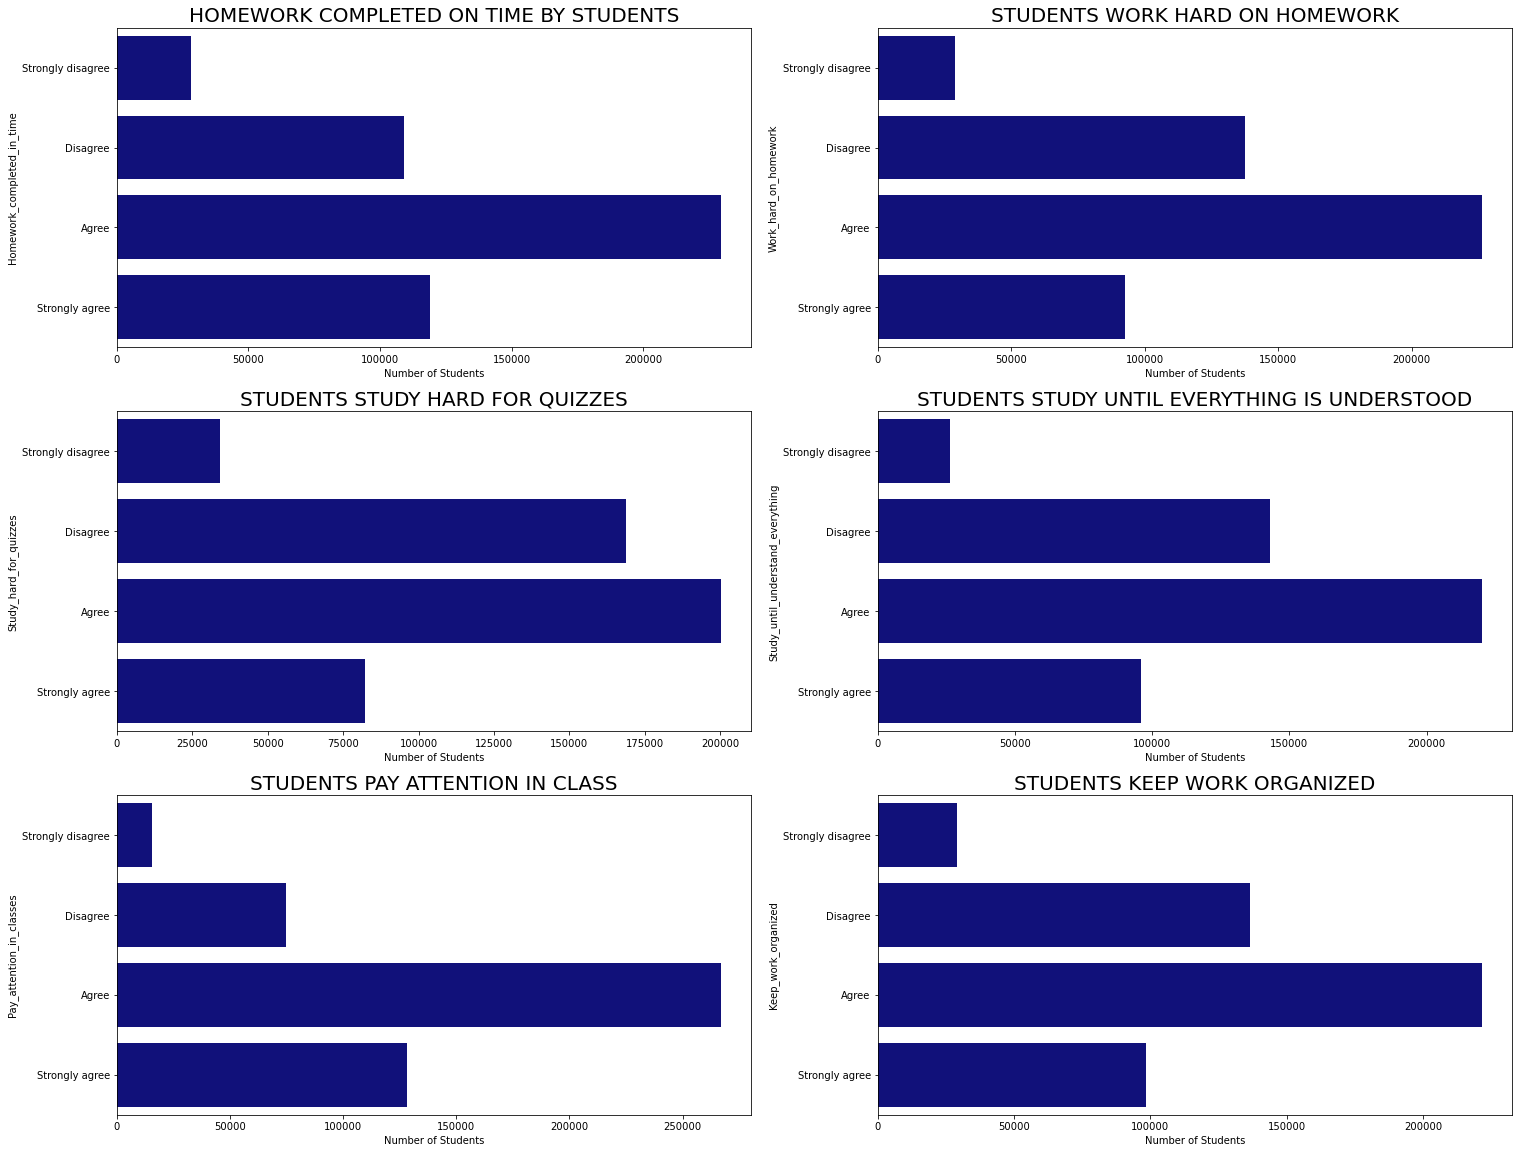

In [198]:
# Let's plot all 6 together
fig, ax = plt.subplots(ncols=2, nrows=3, figsize = [25,20])
order=['Strongly disagree','Disagree','Agree','Strongly agree']

sb.countplot(data=pisa_df_reduced, y='Homework_completed_in_time', color='darkblue', order=order, ax = ax[0,0]).axes.set_title("HOMEWORK COMPLETED ON TIME BY STUDENTS",fontsize=20)
sb.countplot(data=pisa_df_reduced, y='Work_hard_on_homework', color='darkblue', order=order, ax = ax[0,1]).axes.set_title("STUDENTS WORK HARD ON HOMEWORK",fontsize=20);
sb.countplot(data=pisa_df_reduced, y='Study_hard_for_quizzes', color='darkblue', order=order, ax = ax[1,0]).axes.set_title("STUDENTS STUDY HARD FOR QUIZZES",fontsize=20)
sb.countplot(data=pisa_df_reduced, y='Study_until_understand_everything', color='darkblue', order=order, ax = ax[1,1]).axes.set_title("STUDENTS STUDY UNTIL EVERYTHING IS UNDERSTOOD",fontsize=20);
sb.countplot(data=pisa_df_reduced, y='Pay_attention_in_classes', color='darkblue', order=order, ax = ax[2,0]).axes.set_title("STUDENTS PAY ATTENTION IN CLASS",fontsize=20);
sb.countplot(data=pisa_df_reduced, y='Keep_work_organized', color='darkblue', order=order, ax = ax[2,1]).axes.set_title("STUDENTS KEEP WORK ORGANIZED",fontsize=20);

ax[0,0].set(xlabel='Number of Students')
ax[0,1].set(xlabel='Number of Students')
ax[1,0].set(xlabel='Number of Students')
ax[1,1].set(xlabel='Number of Students')
ax[2,0].set(xlabel='Number of Students')
ax[2,1].set(xlabel='Number of Students')

plt.show()

Most of the student's tend to agree with good ethics, but a very significant number of the others don't.

In [199]:
print(pisa_df_reduced.Talk_about_maths_with_friends.value_counts())
print(pisa_df_reduced.Help_friends_with_math.value_counts())
print(pisa_df_reduced.Math_extracurrucula_activity.value_counts())
print(pisa_df_reduced.Study_more_than_extra_2h_aDay.value_counts())
print(pisa_df_reduced.Play_chess.value_counts())

Sometimes                  197135
Never or rarely            166449
Often                       88092
Always or almost always     33814
Name: Talk_about_maths_with_friends, dtype: int64
Sometimes                  214580
Never or rarely            121091
Often                      113148
Always or almost always     36671
Name: Help_friends_with_math, dtype: int64
Never or rarely            249197
Sometimes                  143189
Often                       65268
Always or almost always     27836
Name: Math_extracurrucula_activity, dtype: int64
Never or rarely            278428
Sometimes                  137154
Often                       47026
Always or almost always     22882
Name: Study_more_than_extra_2h_aDay, dtype: int64
Never or rarely            284507
Sometimes                  117692
Often                       54605
Always or almost always     28686
Name: Play_chess, dtype: int64


In [200]:
print(pisa_df_reduced.Math_out_of_school_lessons.value_counts())

I do not attend                           267428
Less than 2 hours a week                   94015
2 or more but less than 4 hours a week     73019
4 or more but less than 6 hours a week     34846
6 or more hours a week                     16182
Name: Math_out_of_school_lessons, dtype: int64


In [23]:
pisa_df_reduced['Math_out_of_school_lessons'] = pisa_df_reduced['Math_out_of_school_lessons'].replace('I do not attend <out-of-school time lessons> in this subject', 'I do not attend')

In [24]:
print(pisa_df_reduced.Math_out_of_school_lessons.value_counts())

I do not attend                           267842
Less than 2 hours a week                   93966
2 or more but less than 4 hours a week     72842
4 or more but less than 6 hours a week     34593
6 or more hours a week                     16247
Name: Math_out_of_school_lessons, dtype: int64


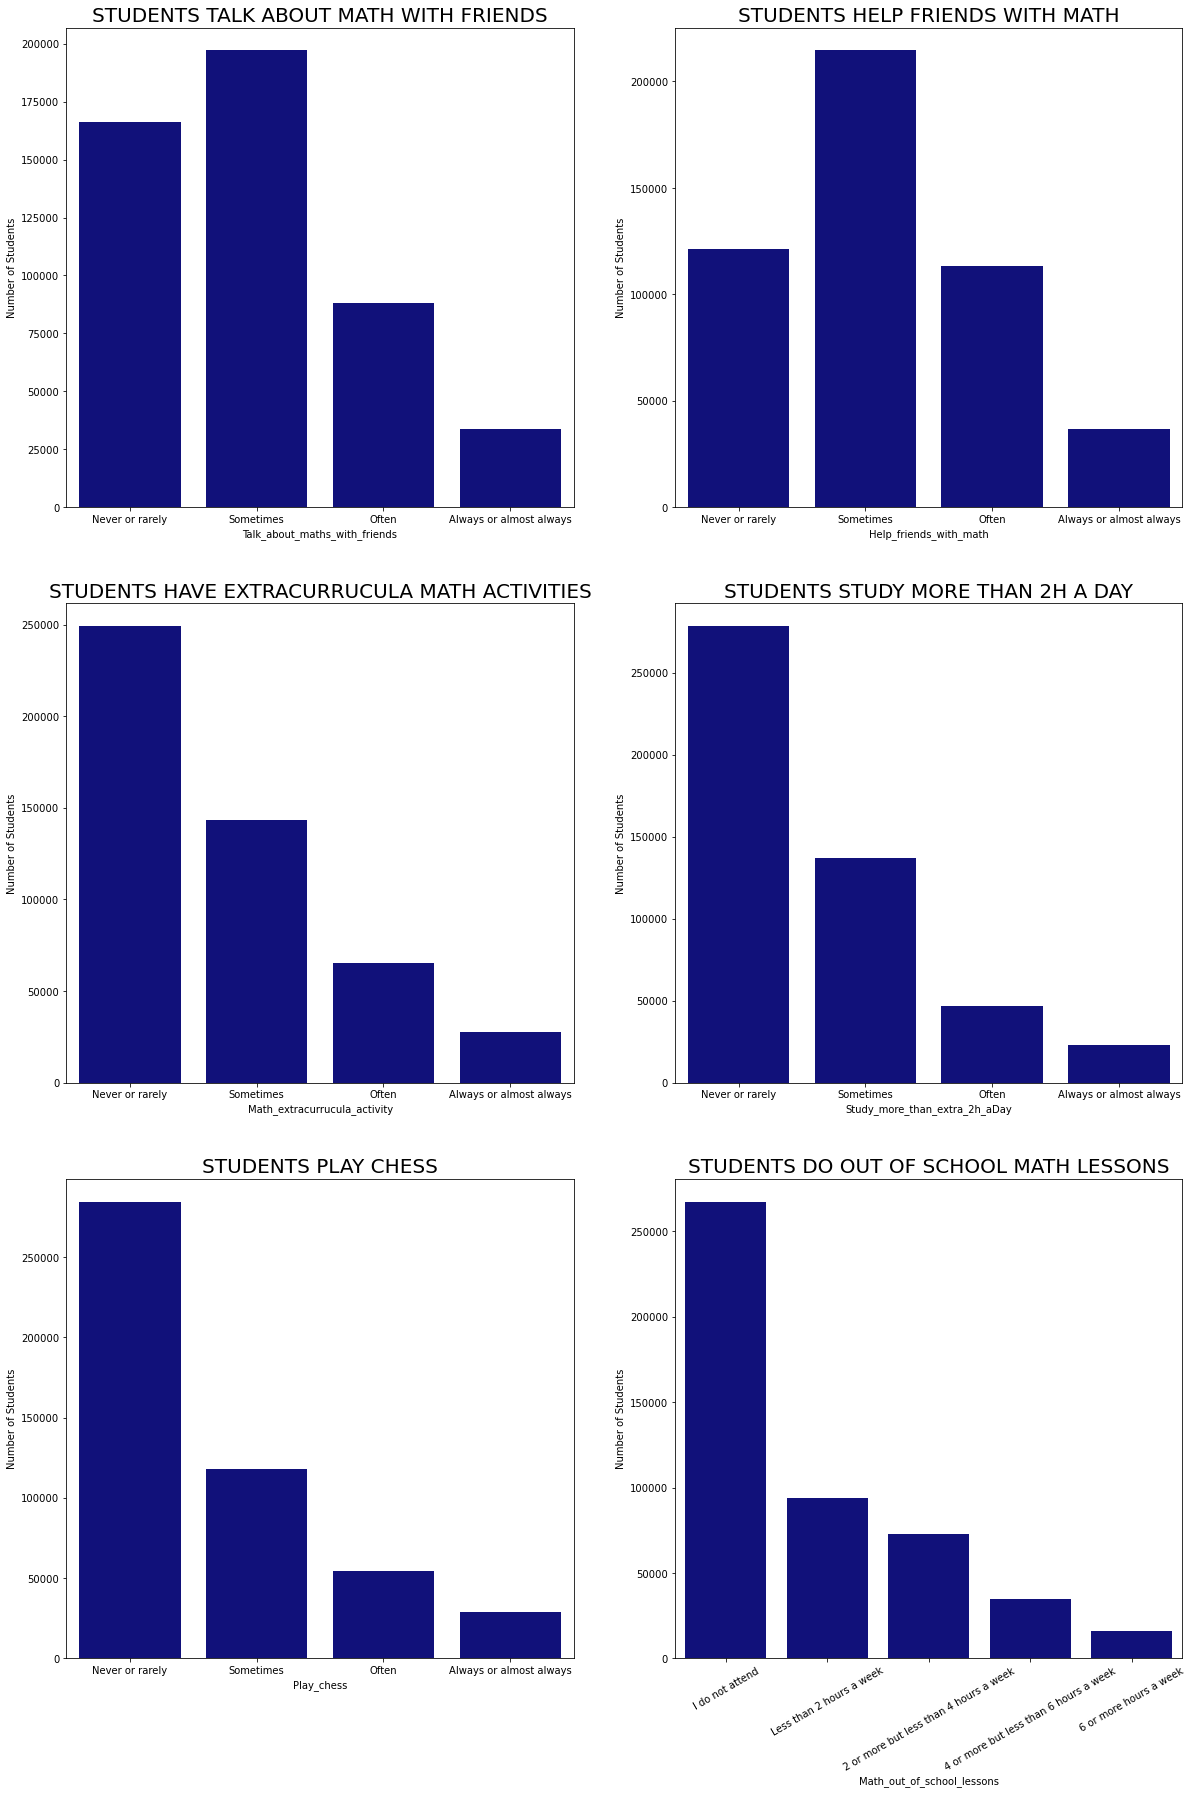

In [203]:
# Let's plot all 5 together
fig, ax = plt.subplots(ncols=2, nrows=3, figsize = [20,30])
order=['Never or rarely','Sometimes','Often','Always or almost always']
order_out_of_school=['I do not attend','Less than 2 hours a week','2 or more but less than 4 hours a week','4 or more but less than 6 hours a week','6 or more hours a week']
sb.countplot(data=pisa_df_reduced, x='Talk_about_maths_with_friends', color='darkblue', order=order, ax = ax[0,0]).axes.set_title("STUDENTS TALK ABOUT MATH WITH FRIENDS",fontsize=20)
sb.countplot(data=pisa_df_reduced, x='Help_friends_with_math', color='darkblue', order=order, ax = ax[0,1]).axes.set_title("STUDENTS HELP FRIENDS WITH MATH",fontsize=20);
sb.countplot(data=pisa_df_reduced, x='Math_extracurrucula_activity', color='darkblue', order=order, ax = ax[1,0]).axes.set_title("STUDENTS HAVE EXTRACURRUCULA MATH ACTIVITIES",fontsize=20)
sb.countplot(data=pisa_df_reduced, x='Study_more_than_extra_2h_aDay', color='darkblue', order=order, ax = ax[1,1]).axes.set_title("STUDENTS STUDY MORE THAN 2H A DAY",fontsize=20);
sb.countplot(data=pisa_df_reduced, x='Play_chess', color='darkblue', order=order, ax = ax[2,0]).axes.set_title("STUDENTS PLAY CHESS",fontsize=20);
sb.countplot(data=pisa_df_reduced, x='Math_out_of_school_lessons', color='darkblue', order=order_out_of_school,  ax = ax[2,1]).axes.set_title("STUDENTS DO OUT OF SCHOOL MATH LESSONS",fontsize=20);


ax[0,0].set(ylabel='Number of Students')
ax[0,1].set(ylabel='Number of Students')
ax[1,0].set(ylabel='Number of Students')
ax[1,1].set(ylabel='Number of Students')
ax[2,0].set(ylabel='Number of Students')
ax[2,1].set(ylabel='Number of Students')
ax[2,1].set_xticklabels(rotation=30, labels=order_out_of_school)
#plt.yticks(rotation=45)
plt.show()

We notice that some behaviours are less common than others

**Students' learning strategies**

Let's find out what are the most common students' learning strategies in mathematics: 

In [204]:
print(pisa_df_reduced.Q01_Learning_strategies.value_counts())
print(pisa_df_reduced.Q02_Learning_strategies.value_counts())
print(pisa_df_reduced.Q03_Learning_strategies.value_counts())
print(pisa_df_reduced.Q04_Learning_strategies.value_counts())

Most important       232250
relating to known    155748
by heart              97492
Name: Q01_Learning_strategies, dtype: int64
Improve understanding    271414
check memory             130991
new ways                  83085
Name: Q02_Learning_strategies, dtype: int64
learning goals                277799
Relating to other subjects    108675
in my sleep                    99016
Name: Q03_Learning_strategies, dtype: int64
Repeat examples     258963
more information    138015
everyday life        88512
Name: Q04_Learning_strategies, dtype: int64


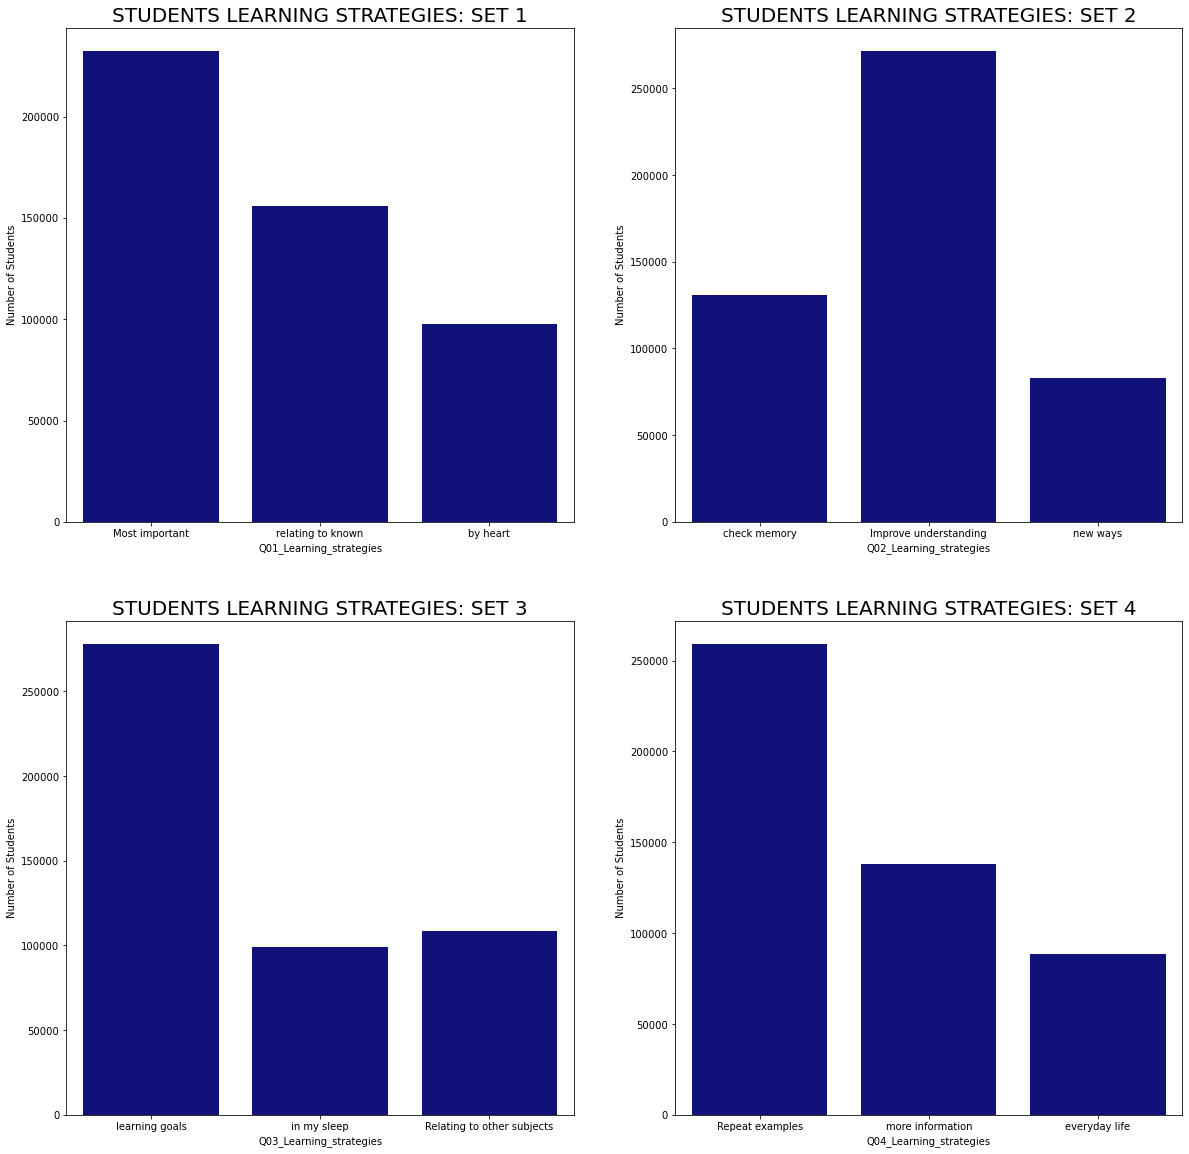

In [205]:
# Let's plot all 4 together
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = [20,20])
sb.countplot(data=pisa_df_reduced, x='Q01_Learning_strategies', color='darkblue', ax = ax[0,0]).axes.set_title("STUDENTS LEARNING STRATEGIES: SET 1",fontsize=20)
sb.countplot(data=pisa_df_reduced, x='Q02_Learning_strategies', color='darkblue', ax = ax[0,1]).axes.set_title("STUDENTS LEARNING STRATEGIES: SET 2",fontsize=20);
sb.countplot(data=pisa_df_reduced, x='Q03_Learning_strategies', color='darkblue', ax = ax[1,0]).axes.set_title("STUDENTS LEARNING STRATEGIES: SET 3",fontsize=20)
sb.countplot(data=pisa_df_reduced, x='Q04_Learning_strategies', color='darkblue', ax = ax[1,1]).axes.set_title("STUDENTS LEARNING STRATEGIES: SET 4",fontsize=20);


ax[0,0].set(ylabel='Number of Students')
ax[0,1].set(ylabel='Number of Students')
ax[1,0].set(ylabel='Number of Students')
ax[1,1].set(ylabel='Number of Students')


plt.show()

Some learning strategies are more common among students than others

## Bivariate Exploration


**Are Boys or Girls getting better scores?**

In [29]:
score_ticks=[0,100,200,300,400,500,600,700,800]

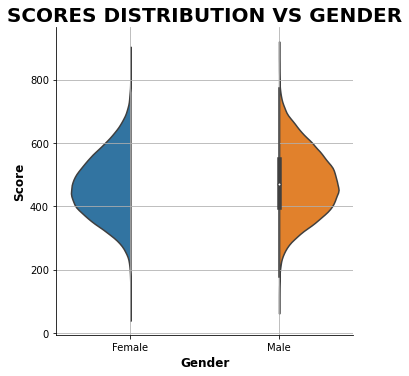

In [283]:
#score_ticks=[0,100,200,300,400,500,600,700]
sb.catplot(data=pisa_df_reduced, kind="violin", x="Gender", y="Avg_math_results", hue="Gender", split=True);
plt.grid()
plt.title('SCORES DISTRIBUTION VS GENDER', fontsize=20, weight='bold')
plt.xlabel('Gender', fontsize=12, weight='bold')
plt.ylabel('Score', fontsize=12, weight='bold');
plt.show();

It seems there are more male students who have a score of 600 or above than female students.

Now, Let's see how many students we have from each country segmented by gender:

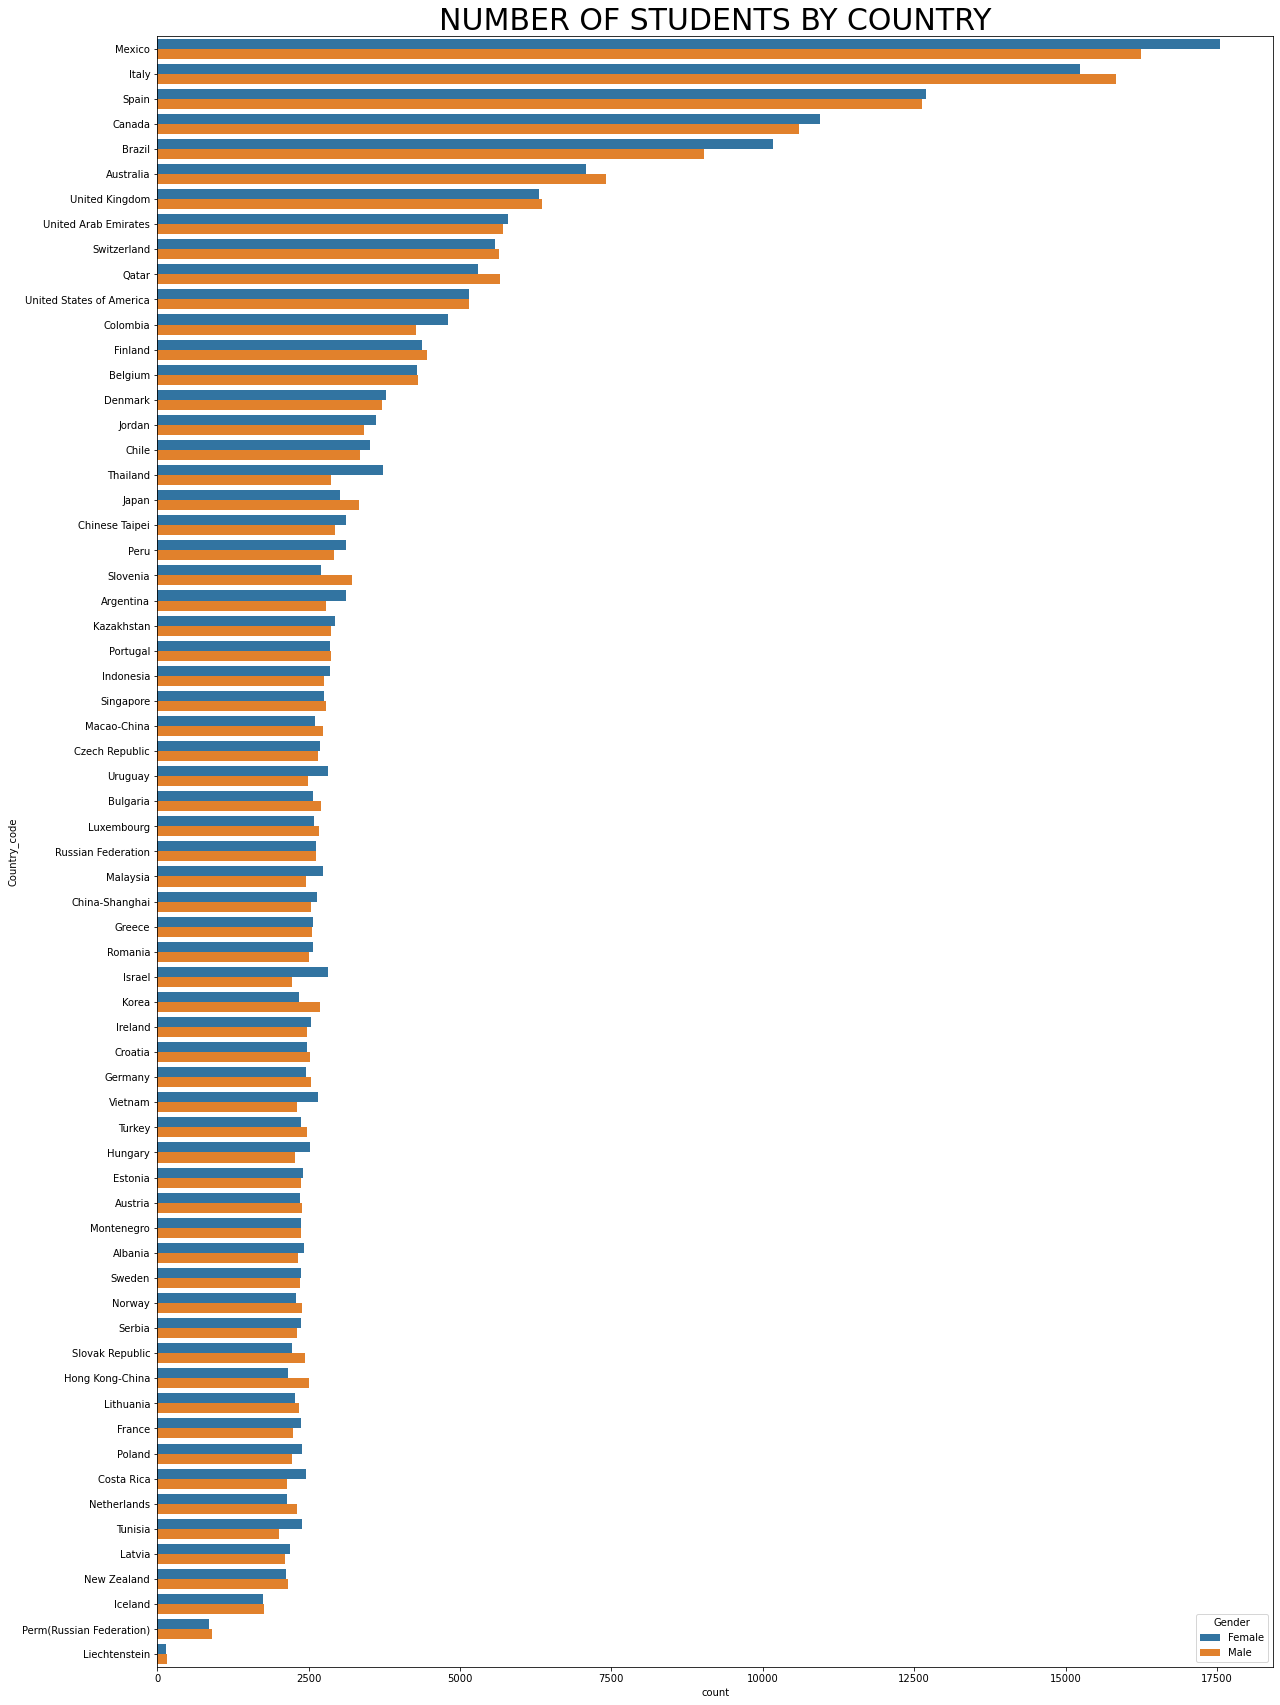

In [224]:
fig, ax = plt.subplots(figsize = [20,30])

order = pisa_df_reduced['Country_code'].value_counts().index
sb.countplot(data=pisa_df_reduced,y='Country_code',order=order, ax = ax, hue='Gender').axes.set_title("NUMBER OF STUDENTS BY COUNTRY",fontsize=30);



Most of the countries have a balanced number of male and female students. However, some have significantly more female students like Mexique, Brazil and Thailand, and others have more male students such as Italy, Slovenia and korea.

**What is the impact of Truancy (Absenteeism) on students' scores**

Let's find out how are the scores of students compared to their absenteeism habits:

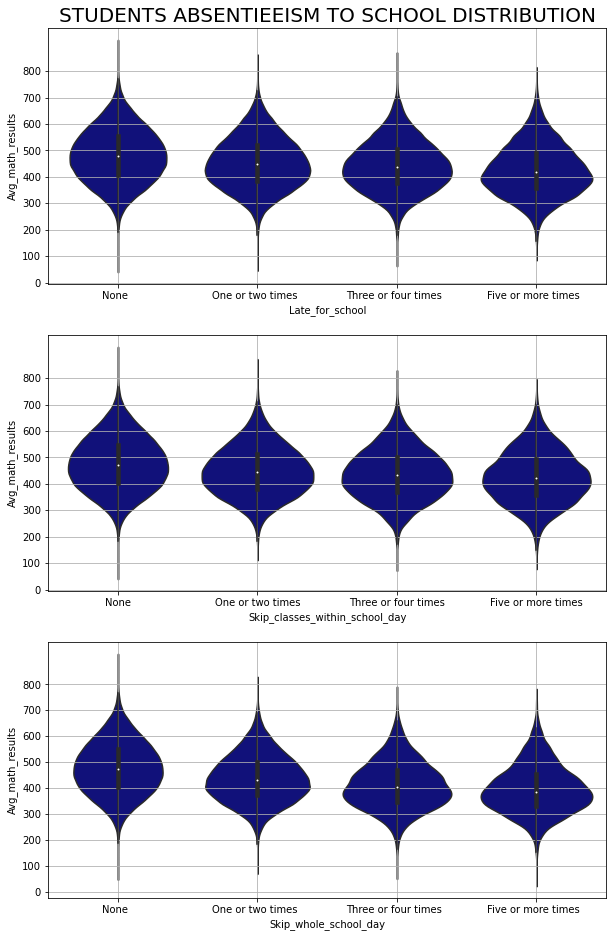

In [30]:
fig, ax = plt.subplots(nrows=3, figsize = [10,16])

order_late= pisa_df_reduced['Late_for_school'].value_counts().index
order_skip_class= pisa_df_reduced['Skip_classes_within_school_day'].value_counts().index
order_skip_day= pisa_df_reduced['Skip_whole_school_day'].value_counts().index

sb.violinplot(data=pisa_df_reduced, x='Late_for_school', y='Avg_math_results', color='darkblue', order=order_late, ax = ax[0]).axes.set_title("STUDENTS ABSENTIEEISM TO SCHOOL DISTRIBUTION",fontsize=20)
sb.violinplot(data=pisa_df_reduced, x='Skip_classes_within_school_day', y='Avg_math_results', color='darkblue', order=order_skip_class, ax = ax[1]);
sb.violinplot(data=pisa_df_reduced, x='Skip_whole_school_day', y='Avg_math_results', color='darkblue', order=order_skip_day, ax = ax[2]);

ax[0].grid()
ax[0].set_yticks(score_ticks)
ax[1].grid()
ax[1].set_yticks(score_ticks)
ax[2].grid()
ax[2].set_yticks(score_ticks)


plt.show()

It seems that the more times students go late to school, skip classes during the day or skip the whole day, the less scores they get in the PISA test.

Also, there are more students with scores above 600 among those who are never late, never skip a class or a school day, than any other category.

**What is the impact of being interested in mathematics on students' scores**

Let's find out how are the scores of students compared to their math interest:

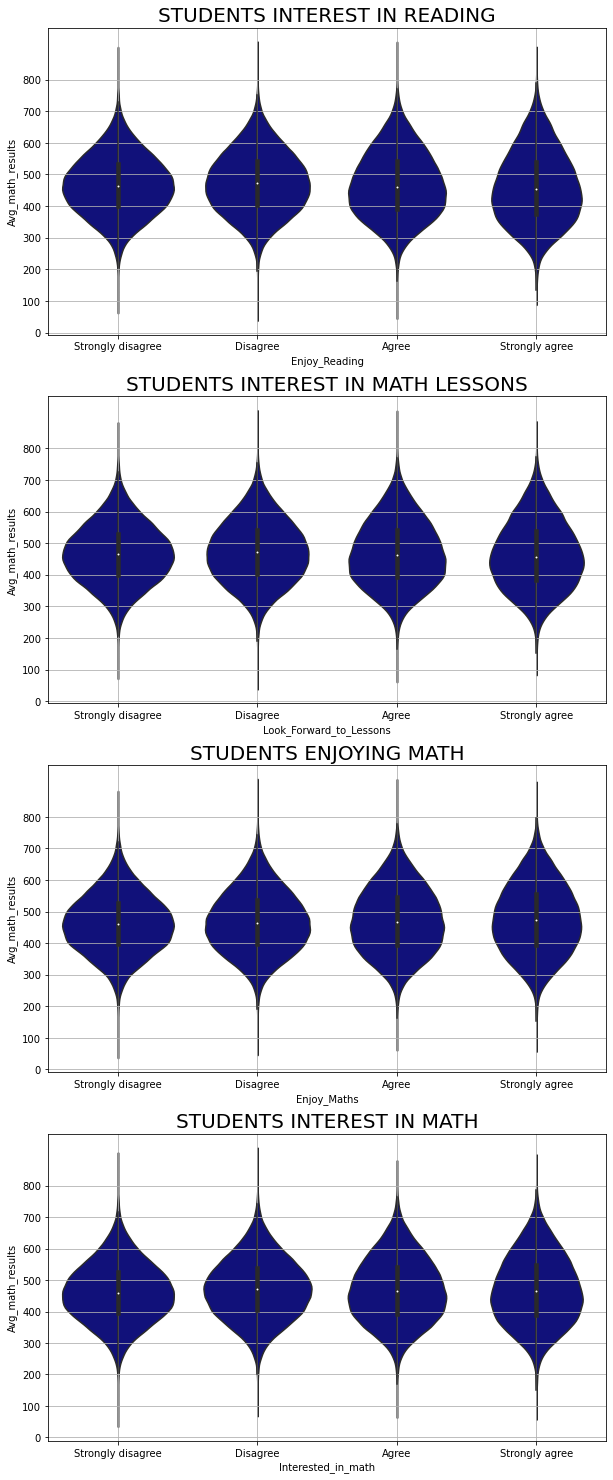

In [32]:
# Let's plot the score of students according to their math interest features:
fig, ax = plt.subplots(nrows=4, figsize = [10,26])

order=['Strongly disagree','Disagree','Agree','Strongly agree']

sb.violinplot(data=pisa_df_reduced, x='Enjoy_Reading', y='Avg_math_results', color='darkblue', order=order, ax = ax[0]).axes.set_title("STUDENTS INTEREST IN READING",fontsize=20)
sb.violinplot(data=pisa_df_reduced, x='Look_Forward_to_Lessons', y='Avg_math_results', color='darkblue', order=order, ax = ax[1]).axes.set_title("STUDENTS INTEREST IN MATH LESSONS",fontsize=20);
sb.violinplot(data=pisa_df_reduced, x='Enjoy_Maths', y='Avg_math_results', color='darkblue', order=order, ax = ax[2]).axes.set_title("STUDENTS ENJOYING MATH",fontsize=20);
sb.violinplot(data=pisa_df_reduced, x='Interested_in_math', y='Avg_math_results', color='darkblue', order=order, ax = ax[3]).axes.set_title("STUDENTS INTEREST IN MATH",fontsize=20);

ax[0].grid()
ax[0].set_yticks(score_ticks)
ax[1].grid()
ax[1].set_yticks(score_ticks)
ax[2].grid()
ax[2].set_yticks(score_ticks)
ax[3].grid()
ax[3].set_yticks(score_ticks)

plt.show()

Students who strongly agree being interested in MATH in general, Math lessons in particular, reading or generally enjoying math are ironically more than students in other categories who have a score of 600 or more and at the same time, also slightly more than students in other categories who have a score of less than 300.

**What is the impact of parents being interested in mathematics on students' scores**

Let's find out how are the scores of students compared to their parents' interest in math:

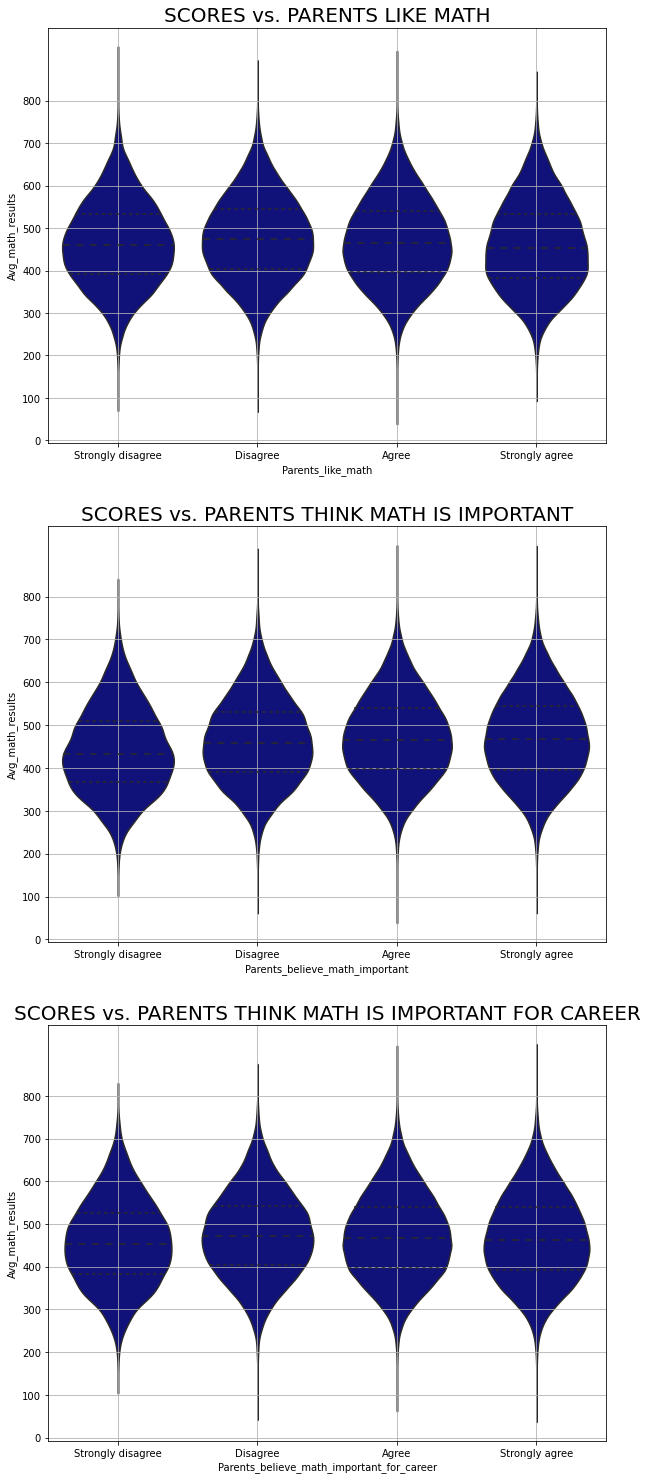

In [284]:
# Let's plot the score of students according to their parents' interest in math:
fig, ax = plt.subplots(nrows=3, figsize = [10,26])

order=['Strongly disagree','Disagree','Agree','Strongly agree']

sb.violinplot(data=pisa_df_reduced, x='Parents_like_math', y='Avg_math_results', color='darkblue', inner='quartile', order=order, ax = ax[0]).axes.set_title("SCORES vs. PARENTS LIKE MATH",fontsize=20)
sb.violinplot(data=pisa_df_reduced, x='Parents_believe_math_important', y='Avg_math_results', color='darkblue', inner='quartile', order=order, ax = ax[1]).axes.set_title("SCORES vs. PARENTS THINK MATH IS IMPORTANT",fontsize=20);
sb.violinplot(data=pisa_df_reduced, x='Parents_believe_math_important_for_career', y='Avg_math_results', color='darkblue', inner='quartile', order=order, ax = ax[2]).axes.set_title("SCORES vs. PARENTS THINK MATH IS IMPORTANT FOR CAREER",fontsize=20);

ax[0].grid()
ax[0].set_yticks(score_ticks)
ax[1].grid()
ax[1].set_yticks(score_ticks)
ax[2].grid()
ax[2].set_yticks(score_ticks)
plt.show()

Although the parents likelihood of math is almost uniformally distributed from strongly disagree to strongly agree, but the number of students who score above 600 is higher among those of whom their parents are aware of the importance of mathematics.

**What is the impact of students' work ethics in mathematics on their scores?**

Let's find out how are the scores of students compared to their work ethics:

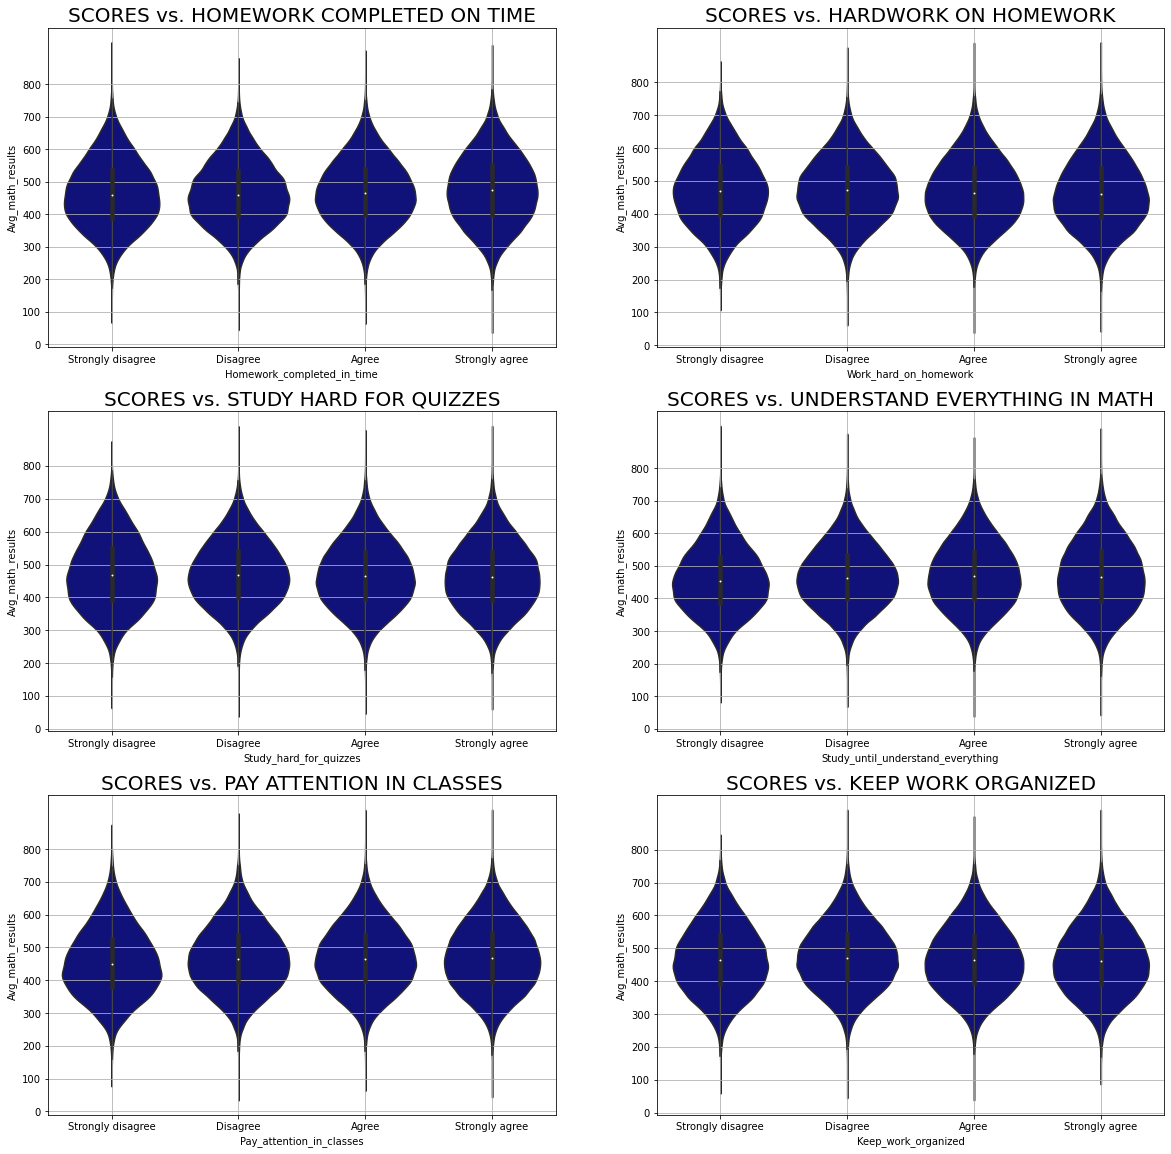

In [34]:
# Let's plot the score of students according to their work ethics in math:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize = [20,20])

order=['Strongly disagree','Disagree','Agree','Strongly agree']

sb.violinplot(data=pisa_df_reduced, x='Homework_completed_in_time', y='Avg_math_results', color='darkblue', order=order, ax = ax[0,0]).axes.set_title("SCORES vs. HOMEWORK COMPLETED ON TIME",fontsize=20)
sb.violinplot(data=pisa_df_reduced, x='Work_hard_on_homework', y='Avg_math_results', color='darkblue', order=order, ax = ax[0,1]).axes.set_title("SCORES vs. HARDWORK ON HOMEWORK",fontsize=20);
sb.violinplot(data=pisa_df_reduced, x='Study_hard_for_quizzes', y='Avg_math_results', color='darkblue', order=order, ax = ax[1,0]).axes.set_title("SCORES vs. STUDY HARD FOR QUIZZES",fontsize=20);
sb.violinplot(data=pisa_df_reduced, x='Study_until_understand_everything', y='Avg_math_results', color='darkblue', order=order, ax = ax[1,1]).axes.set_title("SCORES vs. UNDERSTAND EVERYTHING IN MATH",fontsize=20)
sb.violinplot(data=pisa_df_reduced, x='Pay_attention_in_classes', y='Avg_math_results', color='darkblue', order=order, ax = ax[2,0]).axes.set_title("SCORES vs. PAY ATTENTION IN CLASSES",fontsize=20);
sb.violinplot(data=pisa_df_reduced, x='Keep_work_organized', y='Avg_math_results', color='darkblue', order=order, ax = ax[2,1]).axes.set_title("SCORES vs. KEEP WORK ORGANIZED",fontsize=20);

ax[0,0].grid()
ax[0,0].set_yticks(score_ticks)
ax[0,1].grid()
ax[0,1].set_yticks(score_ticks)
ax[1,0].grid()
ax[1,0].set_yticks(score_ticks)
ax[1,1].grid()
ax[1,1].set_yticks(score_ticks)
ax[2,0].grid()
ax[2,0].set_yticks(score_ticks)
ax[2,1].grid()
ax[2,1].set_yticks(score_ticks)

plt.show()

Although there are slight differences between students' scores with different work ethics, but the impact doesn't seem significantly obvious.

**What is the impact of students' behaviour in mathematics on their scores**

Let's find out how are the scores of students compared to their behaviour:

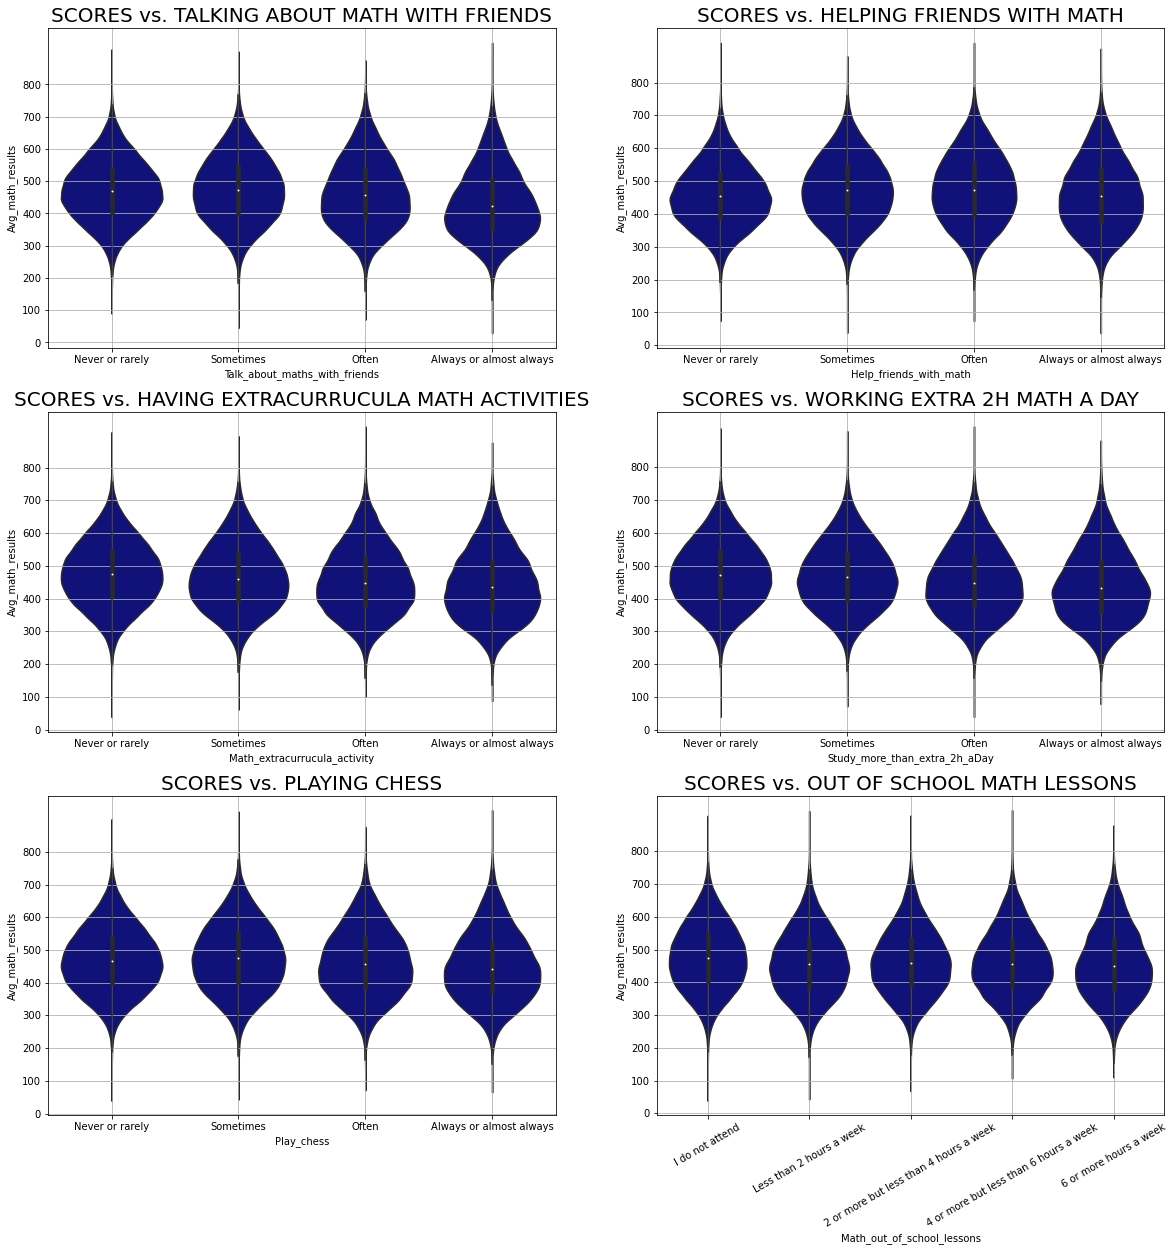

In [35]:
# Let's plot the score of students according to their parents' interest in math:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize = [20,20])

order=['Never or rarely','Sometimes','Often','Always or almost always']
order_out_of_school=['I do not attend','Less than 2 hours a week','2 or more but less than 4 hours a week','4 or more but less than 6 hours a week','6 or more hours a week']

sb.violinplot(data=pisa_df_reduced, x='Talk_about_maths_with_friends', y='Avg_math_results', color='darkblue', order=order, ax = ax[0,0]).axes.set_title("SCORES vs. TALKING ABOUT MATH WITH FRIENDS",fontsize=20)
sb.violinplot(data=pisa_df_reduced, x='Help_friends_with_math', y='Avg_math_results', color='darkblue', order=order, ax = ax[0,1]).axes.set_title("SCORES vs. HELPING FRIENDS WITH MATH",fontsize=20);
sb.violinplot(data=pisa_df_reduced, x='Math_extracurrucula_activity', y='Avg_math_results', color='darkblue', order=order, ax = ax[1,0]).axes.set_title("SCORES vs. HAVING EXTRACURRUCULA MATH ACTIVITIES",fontsize=20);
sb.violinplot(data=pisa_df_reduced, x='Study_more_than_extra_2h_aDay', y='Avg_math_results', color='darkblue', order=order, ax = ax[1,1]).axes.set_title("SCORES vs. WORKING EXTRA 2H MATH A DAY",fontsize=20)
sb.violinplot(data=pisa_df_reduced, x='Play_chess', y='Avg_math_results', color='darkblue', order=order, ax = ax[2,0]).axes.set_title("SCORES vs. PLAYING CHESS",fontsize=20);
sb.violinplot(data=pisa_df_reduced, x='Math_out_of_school_lessons', y='Avg_math_results', color='darkblue',order=order_out_of_school, ax = ax[2,1]).axes.set_title("SCORES vs. OUT OF SCHOOL MATH LESSONS",fontsize=20);

ax[0,0].grid()
ax[0,0].set_yticks(score_ticks)
ax[0,1].grid()
ax[0,1].set_yticks(score_ticks)
ax[1,0].grid()
ax[1,0].set_yticks(score_ticks)
ax[1,1].grid()
ax[1,1].set_yticks(score_ticks)
ax[2,0].grid()
ax[2,0].set_yticks(score_ticks)
ax[2,1].grid()
ax[2,1].set_yticks(score_ticks)

ax[2,1].set_xticklabels(rotation=30, labels=order_out_of_school)

plt.show()

Some behaviours that we would think they help students get better scores seems to be more correlated with worse scores, like working extra 2 hours of math or talking about math with friends. There are more students who got a score less than 300 even while always/almost always practicing these behaviours. It will be interesting to dig deeper on this later.

**What is the impact of students' learning strategies in mathematics on their scores**

Let's find out how are the scores of students compared to their learning strategies:

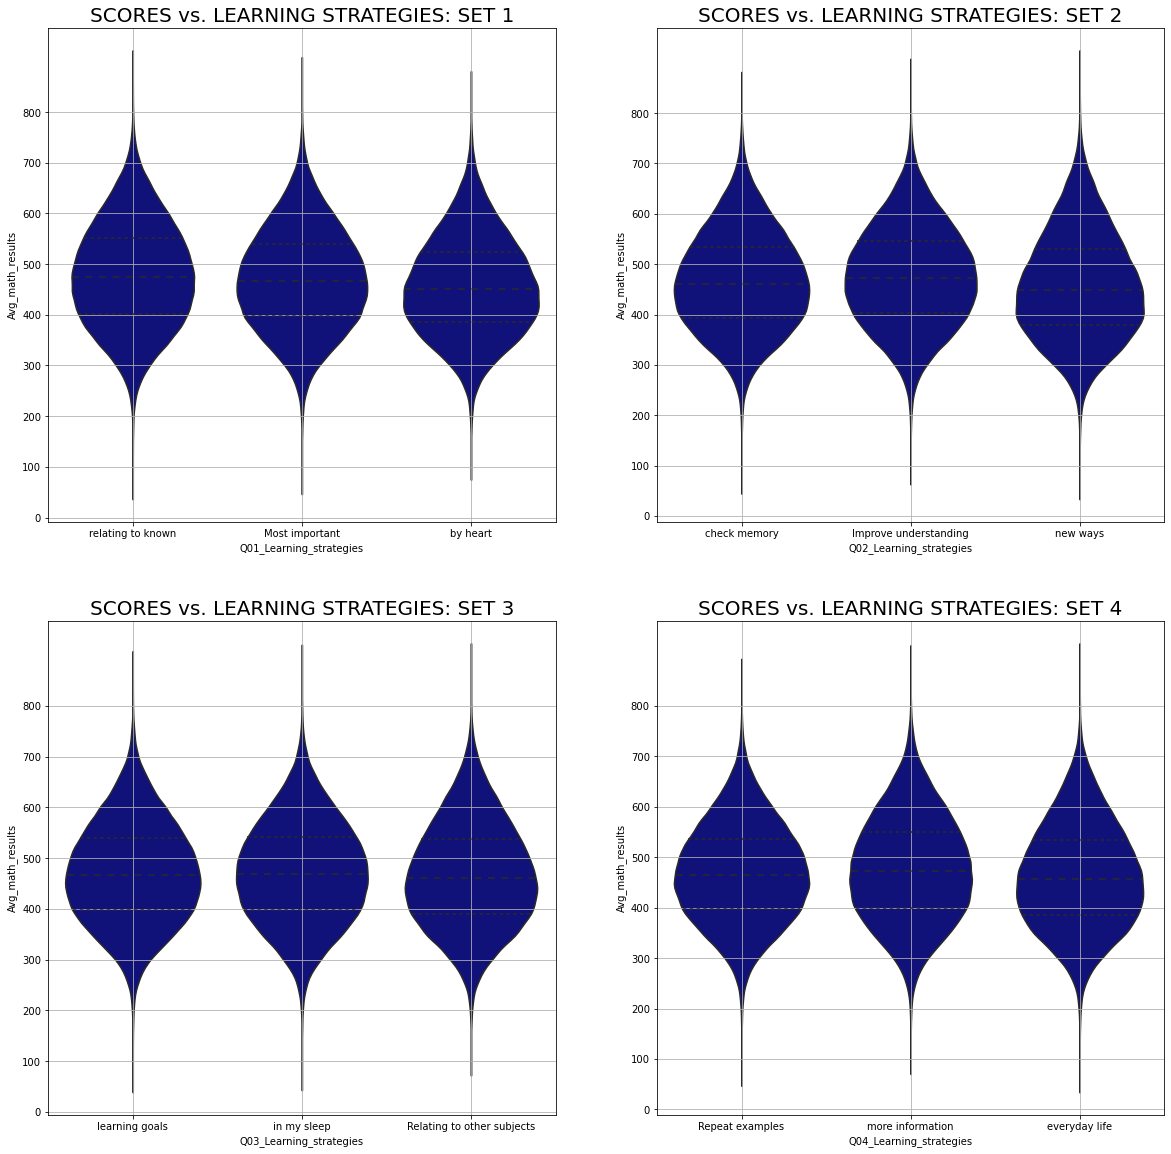

In [38]:
# Let's plot the score of students according to their math learning strategies:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = [20,20])


sb.violinplot(data=pisa_df_reduced, x='Q01_Learning_strategies', y='Avg_math_results', color='darkblue', ax = ax[0,0], inner='quartile').axes.set_title("SCORES vs. LEARNING STRATEGIES: SET 1",fontsize=20)
sb.violinplot(data=pisa_df_reduced, x='Q02_Learning_strategies', y='Avg_math_results', color='darkblue', ax = ax[0,1], inner='quartile').axes.set_title("SCORES vs. LEARNING STRATEGIES: SET 2",fontsize=20);
sb.violinplot(data=pisa_df_reduced, x='Q03_Learning_strategies', y='Avg_math_results', color='darkblue', ax = ax[1,0], inner='quartile').axes.set_title("SCORES vs. LEARNING STRATEGIES: SET 3",fontsize=20);
sb.violinplot(data=pisa_df_reduced, x='Q04_Learning_strategies', y='Avg_math_results', color='darkblue', ax = ax[1,1], inner='quartile').axes.set_title("SCORES vs. LEARNING STRATEGIES: SET 4",fontsize=20)

ax[0,0].grid()
ax[0,0].set_yticks(score_ticks)
ax[0,1].grid()
ax[0,1].set_yticks(score_ticks)
ax[1,0].grid()
ax[1,0].set_yticks(score_ticks)
ax[1,1].grid()
ax[1,1].set_yticks(score_ticks)
plt.show()

There are some learning strategies that made students have less scores than others

**Students scoring 600 or above in the math Average score**

In [232]:
pisa_df_600=pisa_df_reduced.query('Avg_math_results>=600')

In [233]:
pisa_df_600.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52538 entries, 40 to 485455
Data columns (total 96 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Country_code                                        52538 non-null  object 
 1   OECD_1_0                                            52538 non-null  object 
 2   NC                                                  52538 non-null  object 
 3   International_grade                                 52538 non-null  int64  
 4   Birth_Month                                         52538 non-null  int64  
 5   Birth_Year                                          52538 non-null  int64  
 6   Gender                                              52538 non-null  object 
 7   Late_for_school                                     52538 non-null  object 
 8   Skip_whole_school_day                               52538 non-null  object

**What are the top 5 countries in terms of math mean scores**

In [74]:
pisa_df_reduced_copy=pisa_df_reduced.copy()

In [91]:
# Create a list of unique sorted countries in order to add it to the dataframe grouped by 
# the mean value of average scores.
pisa_df_countries=pisa_df_reduced_copy['Country_code'].unique()
pisa_list_countries =pisa_df_countries.tolist()
pisa_list_countries.sort()
print(pisa_list_countries)

['Albania', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China-Shanghai', 'Chinese Taipei', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong-China', 'Hungary', 'Iceland', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Korea', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao-China', 'Malaysia', 'Mexico', 'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Perm(Russian Federation)', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russian Federation', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Tunisia', 'Turkey', 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Uruguay', 'Vietnam']


In [262]:
pisa_df_mean_scores=pisa_df_reduced.groupby(['Country_code'])['Avg_math_results'].mean()
pisa_df_mean_worst=pisa_df_reduced.groupby(['Country_code'])['Avg_math_results'].mean()
pisa_df_mean_scores=pisa_df_mean_scores.to_frame()
pisa_df_mean_worst=pisa_df_mean_worst.to_frame()
pisa_df_mean_scores['Countries'] = np.array(pisa_list_countries)
pisa_df_mean_worst['Countries'] = np.array(pisa_list_countries)

pisa_df_mean_scores=pisa_df_mean_scores.sort_values(by='Avg_math_results', ascending=False).iloc[0:5]
pisa_df_mean_worst=pisa_df_mean_worst.sort_values(by='Avg_math_results', ascending=True).iloc[0:5]
print(pisa_df_mean_scores.head())
print(pisa_df_mean_scores.shape)
print(pisa_df_mean_worst.head())


                 Avg_math_results        Countries
Country_code                                      
China-Shanghai         611.438933   China-Shanghai
Singapore              568.546974        Singapore
Hong Kong-China        561.052123  Hong Kong-China
Chinese Taipei         558.312010   Chinese Taipei
Korea                  553.752034            Korea
(5, 2)
              Avg_math_results  Countries
Country_code                             
Peru                367.859676       Peru
Indonesia           375.621968  Indonesia
Qatar               376.339232      Qatar
Brazil              382.547146     Brazil
Jordan              382.739077     Jordan


- I kept China-Shanghai and Hong Kong-China each as a country even if they are not because we don't have data about whole China and it wouldn't be right to gather both as a representation of all China.
- Now we are sure that each country has its true Average math score.

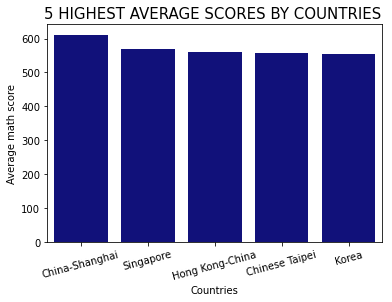

In [227]:
# Let's plot the average score of each country the 5 highest
base_color = sb.color_palette()[0];
ax=sb.barplot(data=pisa_df_mean_scores, x='Countries', y='Avg_math_results', color='darkblue').axes.set_title("5 HIGHEST AVERAGE SCORES BY COUNTRIES ",fontsize=15);
plt.xticks(rotation=15);
plt.ylabel('Average math score');


The best 5 countries in terms of the mean score of their students are:

1.  China-Shanghai

2. Singapore

3. Hong Kong-China

4. Chinese Taipei

5. Korea

This makes me wander what are the learning strategies, working ethics, behaviours, truancy and interest at mathematics among students in these countries.

In [263]:
# Countries with highest scores
pisa_df_reduced_Shanghai=pisa_df_reduced.query('Country_code=="China-Shanghai"')
pisa_df_Singapore=pisa_df_reduced.query('Country_code=="Singapore"')
pisa_df_Hong_kong=pisa_df_reduced.query('Country_code=="Hong Kong-China"')
pisa_df_Taipei=pisa_df_reduced.query('Country_code=="Chinese Taipei"')
pisa_df_Korea=pisa_df_reduced.query('Country_code=="Korea"')

# Countries with lowest scores
pisa_df_Peru=pisa_df_reduced.query('Country_code=="Peru"')


In [264]:
print(pisa_df_Singapore.shape)
print(pisa_df_Hong_kong.shape)
print(pisa_df_Taipei.shape)
print(pisa_df_Korea.shape)

print(pisa_df_Peru.shape)

(5546, 96)
(4670, 96)
(6046, 96)
(5033, 96)
(6035, 96)


Let's compare different features between Peru with Taipei since they have almost the same number of students:

**Peruvian work ethics:**

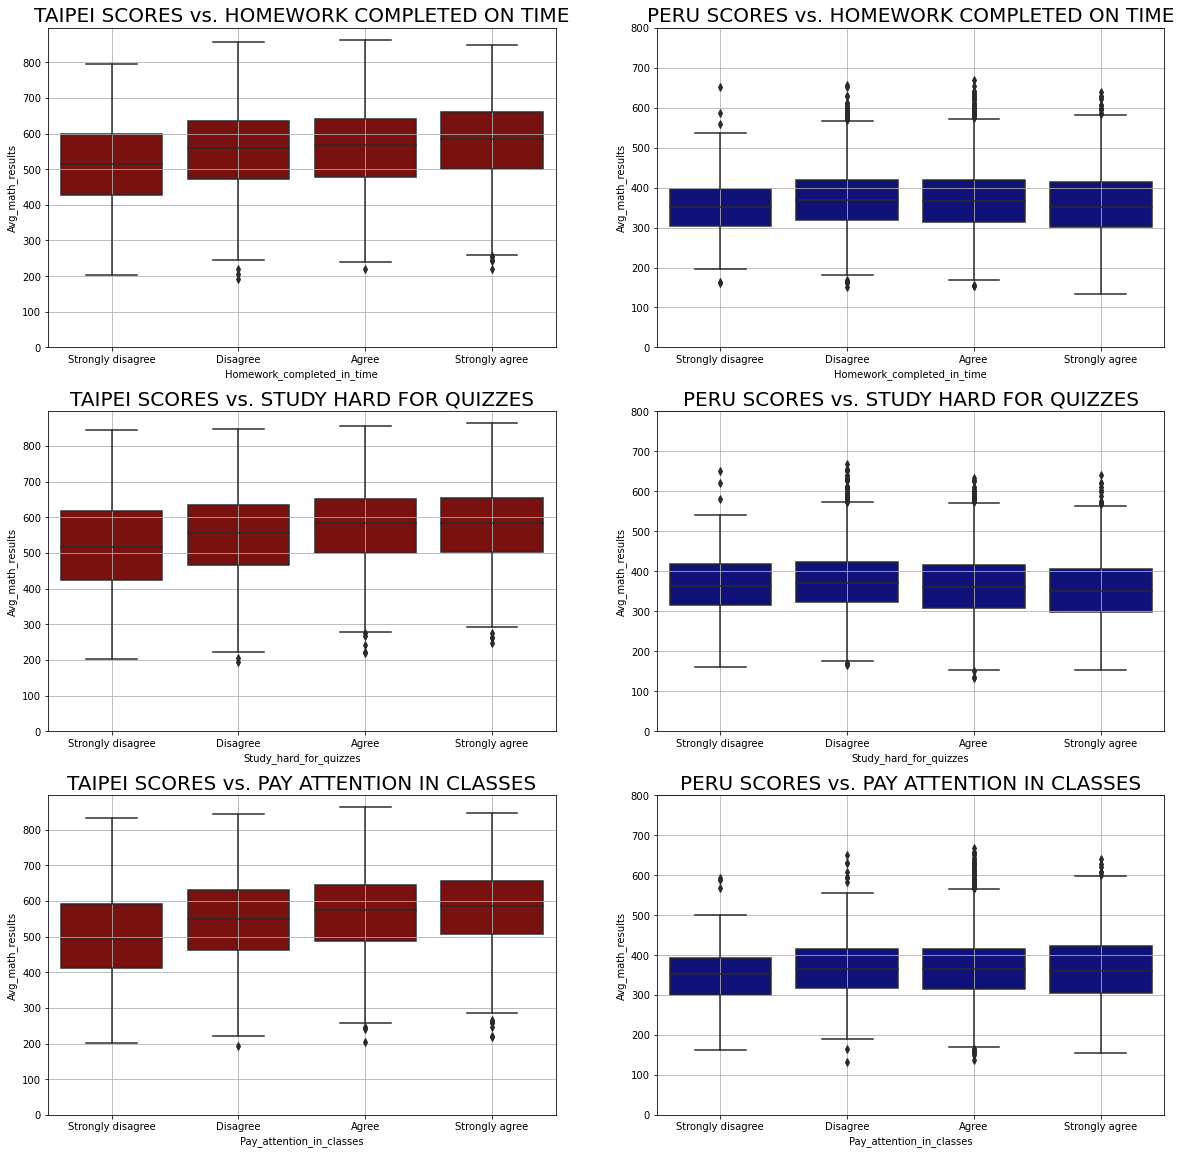

In [265]:
# Let's plot the score of Taipei vs Peru students according to some of their work ethics in math:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize = [20,20])

order=['Strongly disagree','Disagree','Agree','Strongly agree']

sb.boxplot(data=pisa_df_Taipei, x='Homework_completed_in_time', y='Avg_math_results', color='darkred', order=order, ax = ax[0,0]).axes.set_title("TAIPEI SCORES vs. HOMEWORK COMPLETED ON TIME",fontsize=20)
sb.boxplot(data=pisa_df_Peru, x='Homework_completed_in_time', y='Avg_math_results', color='darkblue', order=order, ax = ax[0,1]).axes.set_title("PERU SCORES vs. HOMEWORK COMPLETED ON TIME",fontsize=20)

#sb.boxplot(data=pisa_df_Taipei, x='Work_hard_on_homework', y='Avg_math_results', color='darkred', order=order, ax = ax[0,1]).axes.set_title("SCORES vs. HARDWORK ON HOMEWORK",fontsize=20);
sb.boxplot(data=pisa_df_Taipei, x='Study_hard_for_quizzes', y='Avg_math_results', color='darkred', order=order, ax = ax[1,0]).axes.set_title("TAIPEI SCORES vs. STUDY HARD FOR QUIZZES",fontsize=20);
sb.boxplot(data=pisa_df_Peru, x='Study_hard_for_quizzes', y='Avg_math_results', color='darkblue', order=order, ax = ax[1,1]).axes.set_title("PERU SCORES vs. STUDY HARD FOR QUIZZES",fontsize=20);

#sb.boxplot(data=pisa_df_Taipei, x='Study_until_understand_everything', y='Avg_math_results', color='darkred', order=order, ax = ax[1,1]).axes.set_title("SCORES vs. UNDERSTAND EVERYTHING IN MATH",fontsize=20)
sb.boxplot(data=pisa_df_Taipei, x='Pay_attention_in_classes', y='Avg_math_results', color='darkred', order=order, ax = ax[2,0]).axes.set_title("TAIPEI SCORES vs. PAY ATTENTION IN CLASSES",fontsize=20);
sb.boxplot(data=pisa_df_Peru, x='Pay_attention_in_classes', y='Avg_math_results', color='darkblue', order=order, ax = ax[2,1]).axes.set_title("PERU SCORES vs. PAY ATTENTION IN CLASSES",fontsize=20);

#sb.boxplot(data=pisa_df_Taipei, x='Keep_work_organized', y='Avg_math_results', color='darkred', order=order, ax = ax[2,1]).axes.set_title("SCORES vs. KEEP WORK ORGANIZED",fontsize=20);

ax[0,0].grid()
ax[0,0].set_yticks(score_ticks)
ax[0,1].grid()
ax[0,1].set_yticks(score_ticks)
ax[1,0].grid()
ax[1,0].set_yticks(score_ticks)
ax[1,1].grid()
ax[1,1].set_yticks(score_ticks)
ax[2,0].grid()
ax[2,0].set_yticks(score_ticks)
ax[2,1].grid()
ax[2,1].set_yticks(score_ticks)

plt.show()

## Multivariate Exploration


**Let's see how correlated are Avrage results of different disciplines**

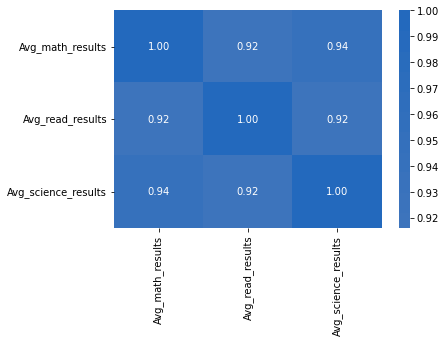

In [172]:
sb.heatmap(pisa_df_reduced_Shanghai[['Avg_math_results','Avg_read_results','Avg_science_results']].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

<Figure size 432x288 with 0 Axes>

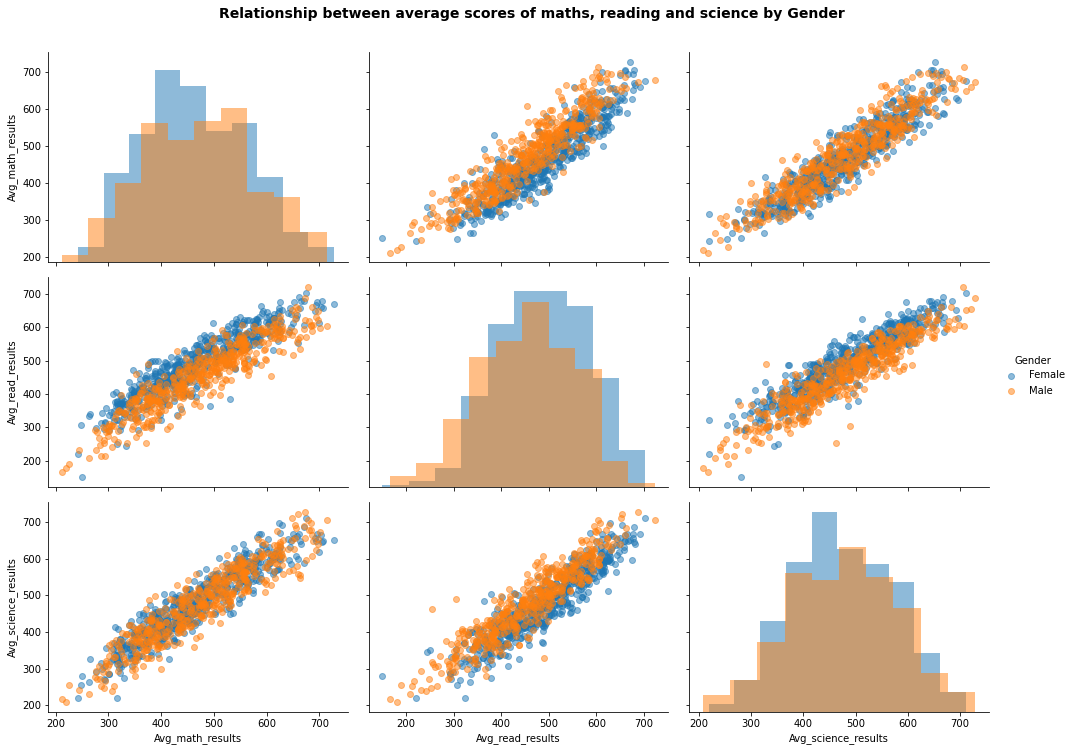

In [268]:
# Relationships between math, science and reading mean scores by gender

# Sample 1000 students so that plots are clearer and they render faster
sample = np.random.choice(pisa_df_reduced.shape[0], 1000, replace = False);
pisa_df_sample = pisa_df_reduced.loc[sample,:];

# plot:
plt.tight_layout();
ax = sb.PairGrid(data=pisa_df_sample, vars = ['Avg_math_results', 'Avg_read_results', 'Avg_science_results'], hue='Gender', height = 10/3, aspect = (14/3)/(10/3));
ax.map_diag(plt.hist, alpha=0.5);
ax.map_offdiag(plt.scatter, alpha=0.5);
ax.fig.suptitle('Relationship between average scores of maths, reading and science by Gender', fontsize=18, weight='bold', y = 1.02);
ax.add_legend();

It seems that the Average results of different disciplines are positively and highly correlated.

**The distribution of scores according to students' grades and gender**

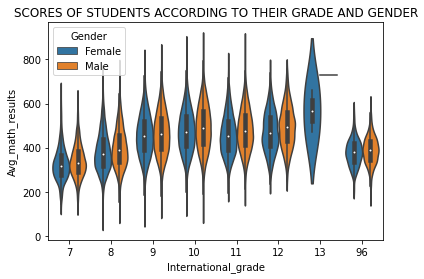

In [152]:
sb.violinplot(data = pisa_df_reduced, x='International_grade', y='Avg_math_results', hue = 'Gender').axes.set_title("SCORES OF STUDENTS ACCORDING TO THEIR GRADE AND GENDER",fontsize=12);
plt.show();


- It seems that the most advanced students in the math program score far better than the less advanced. Students at 7th grade get the worst scores.

- 96 is not a grade, it's a code for missing or erronous values.

**Effective learning strategies used by students in China-shanghai:**

In [126]:
pisa_df_reduced_Shanghai=pisa_df_reduced.query('Country_code=="China-Shanghai"')

- Learning strategy 1:

In [142]:
pisa_df_reduced_Shanghai.Q01_Learning_strategies.value_counts()

Most important       2192
relating to known    1765
by heart             1220
Name: Q01_Learning_strategies, dtype: int64

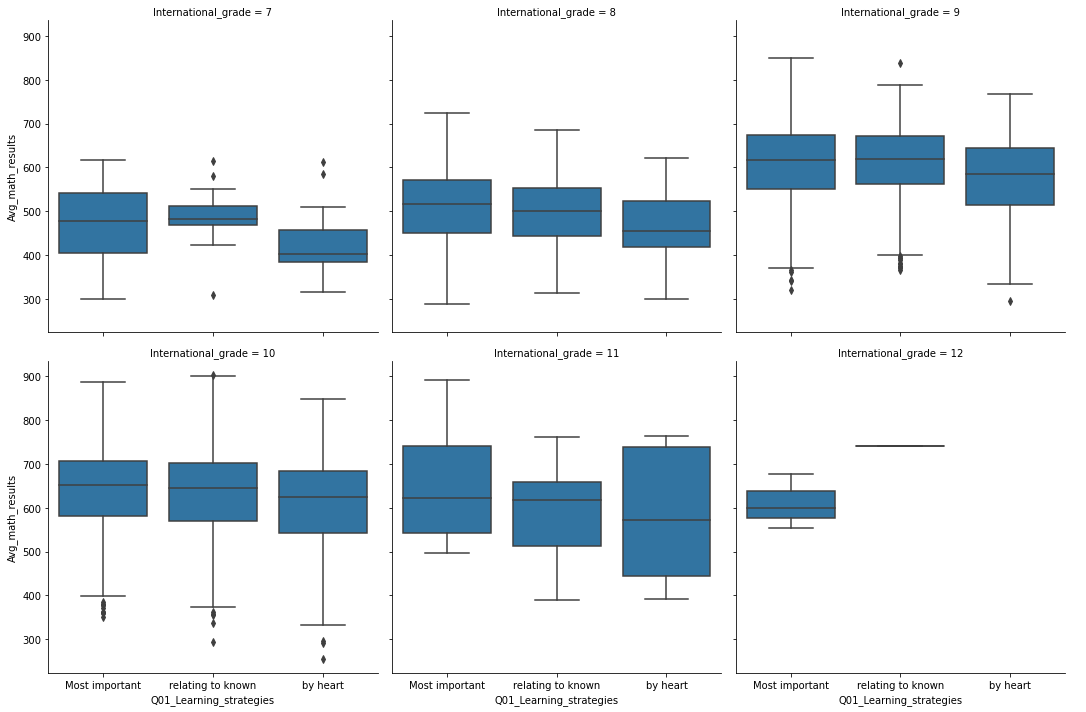

In [149]:
g = sb.FacetGrid(data = pisa_df_reduced_Shanghai, col = 'International_grade', height= 5, col_wrap=3 , margin_titles = True);
g.map(sb.boxplot, 'Q01_Learning_strategies', 'Avg_math_results', order=['Most important','relating to known','by heart']);
g.add_legend();


- Shanghai students who focus on most important math concepts as a learning strategy seem to perform generally better than those who learn by relating to known things and far better than those who are learning by heart.

- At grade 11, the number of Shanghai students who learn by heart goes up and then, no one continue learning by heart at grade 12.

Let's see scores of Shanghai students according to their grades and gender:

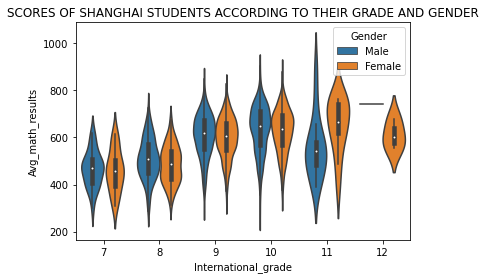

In [151]:
sb.violinplot(data = pisa_df_reduced_Shanghai, x='International_grade', y='Avg_math_results', hue = 'Gender').axes.set_title("SCORES OF SHANGHAI STUDENTS ACCORDING TO THEIR GRADE AND GENDER",fontsize=12);
plt.show();

There is a significant difference of score between male and female students in grade 11. The latter generally scored better results.

- Learning strategy 2:

In [154]:
pisa_df_reduced_Shanghai.Q02_Learning_strategies.value_counts()

Improve understanding    2588
check memory             1605
new ways                  984
Name: Q02_Learning_strategies, dtype: int64

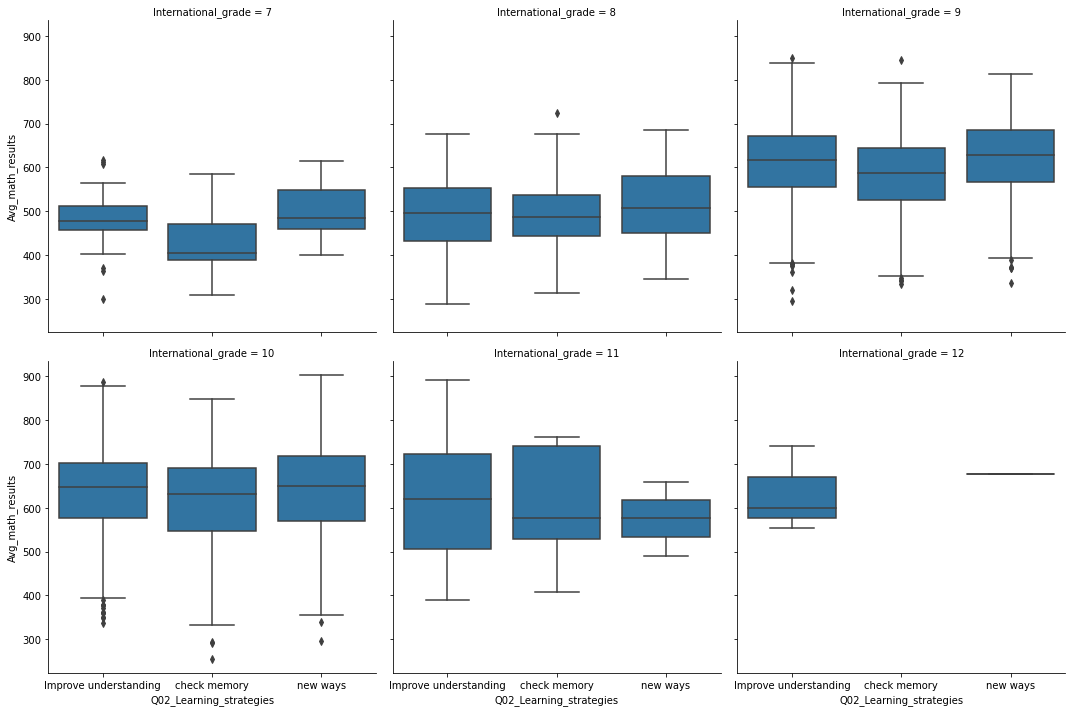

In [155]:
g = sb.FacetGrid(data = pisa_df_reduced_Shanghai, col = 'International_grade', height= 5, col_wrap=3 , margin_titles = True);
g.map(sb.boxplot, 'Q02_Learning_strategies', 'Avg_math_results', order=['Improve understanding','check memory','new ways']);
g.add_legend();

- In grade 7, finding new ways strategy seems bring the best results.

- Learning strategy 3:

In [156]:
pisa_df_reduced_Shanghai.Q03_Learning_strategies.value_counts()

learning goals                2847
Relating to other subjects    1321
in my sleep                   1009
Name: Q03_Learning_strategies, dtype: int64

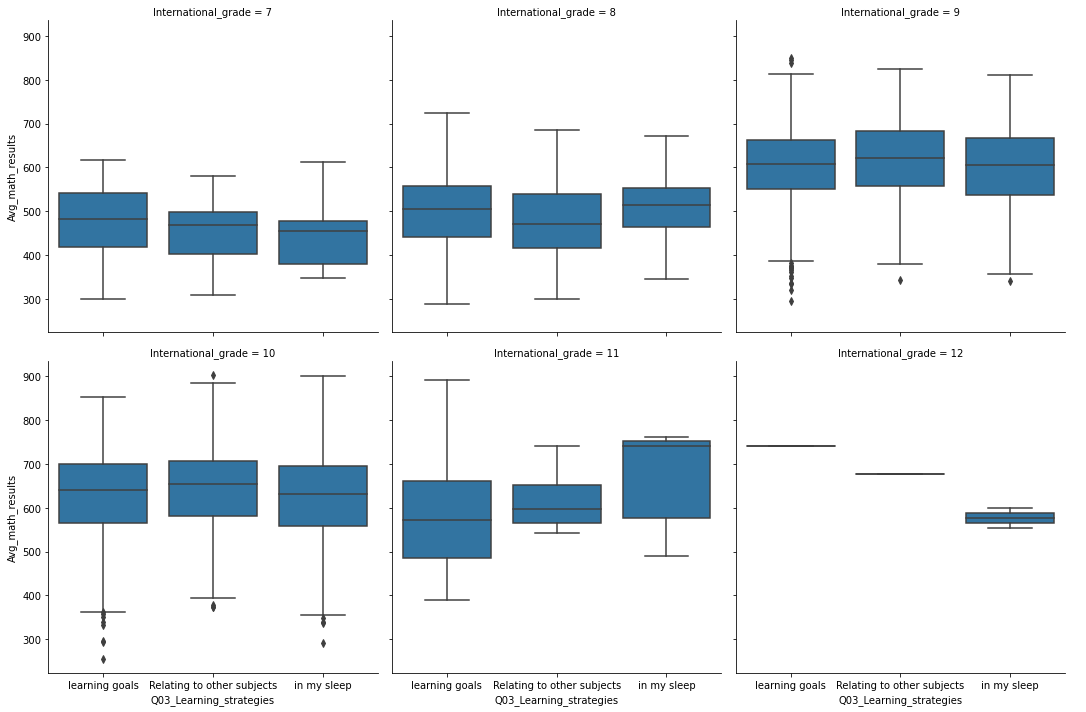

In [158]:
g = sb.FacetGrid(data = pisa_df_reduced_Shanghai, col = 'International_grade', height= 5, col_wrap=3 , margin_titles = True);
g.map(sb.boxplot, 'Q03_Learning_strategies', 'Avg_math_results', order=['learning goals','Relating to other subjects','in my sleep']);
g.add_legend();

- Learning strategy 4:

In [159]:
pisa_df_reduced_Shanghai.Q04_Learning_strategies.value_counts()

Repeat examples     2477
more information    1835
everyday life        865
Name: Q04_Learning_strategies, dtype: int64

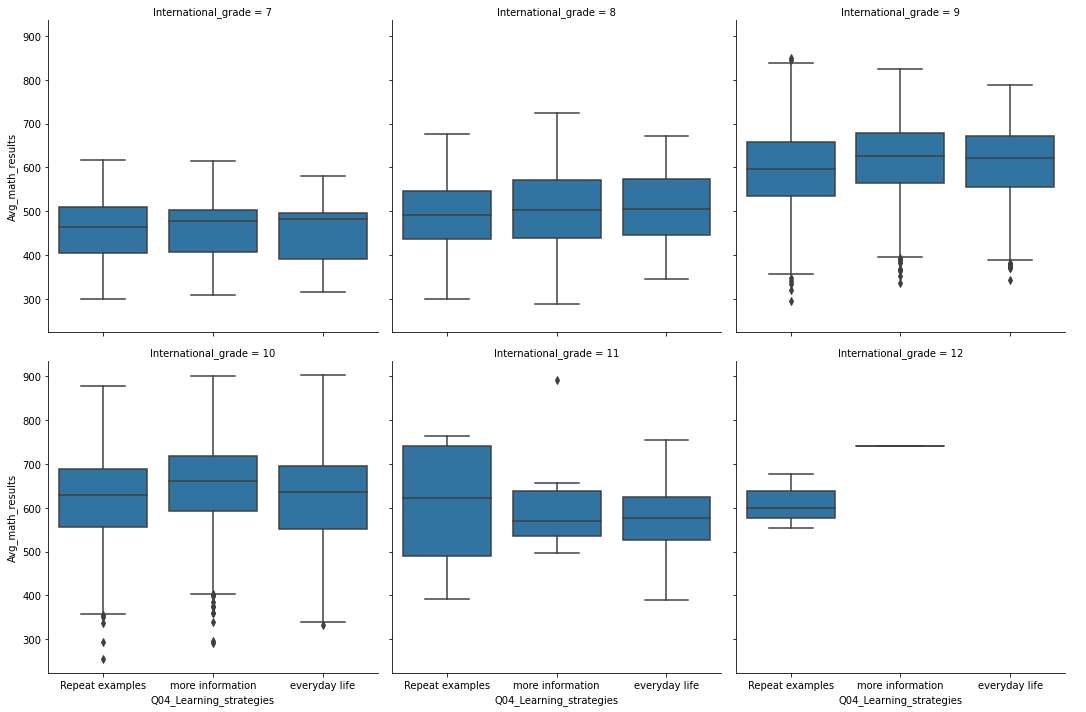

In [166]:
g = sb.FacetGrid(data = pisa_df_reduced_Shanghai, col = 'International_grade', height= 5, col_wrap=3 , margin_titles = True);
g.map(sb.boxplot, 'Q04_Learning_strategies', 'Avg_math_results', order=['Repeat examples','more information','everyday life']);
g.add_legend();

Let's explore the scores of Shanghai students by learning strategies and gender:

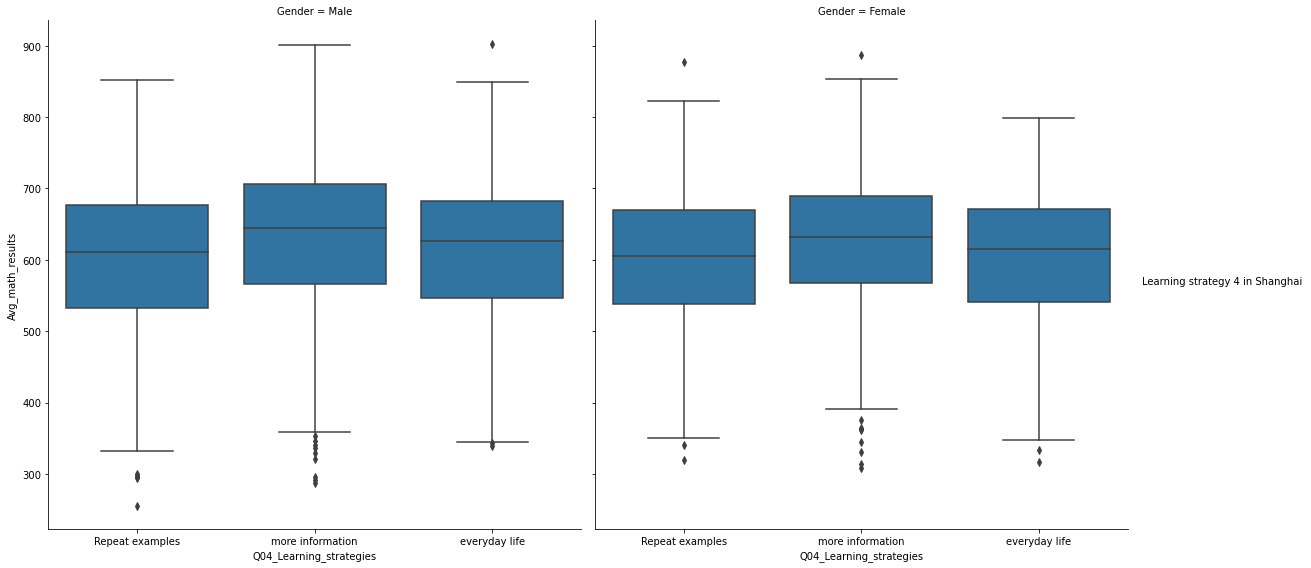

In [169]:
g = sb.FacetGrid(data = pisa_df_reduced_Shanghai, col = 'Gender', height= 8, col_wrap=2 );
g.map(sb.boxplot, 'Q04_Learning_strategies', 'Avg_math_results', order=['Repeat examples','more information','everyday life']);
g.add_legend(title = 'Learning strategy 4 in Shanghai');

Almost the same percentage of both male and female students in Shanghai follow almost the same strategies with th "seeking more information" strategy being the most prominent for both genders.

## Conclusions



**In the previous data exploration, we looked at:**
    
    - The dataset quality.

    - Various data visualizations, mostly related to students average math scores and/or their relationship with other features such as:

        - Gender

        - Grades

        - Students' interest in mathematics

        - Parents' opinion about mathematics

        - Students' ethics and behaviour

        - Students' atributions to failure

        - Students' learning strategies

    - We checked some countries with the best/worst average math scores, and we started exploring some of their specifications.